# EDA and Regression Analysis on Happiness Score Datasets

## INTRODUCTION:
Happiness is a personal state characterised by feelings of delight, satisfaction, happiness, etc. While happiness has various definitions, it is frequently depicted as including positive feelings and life satisfaction.

**The World Happiness Report** is a milestone review of the condition of worldwide happiness.The report has earned universal praise as governments, corporations and civil society progressively use happiness pointers as a guide for their future strategies. Specialists across fields including financial, biology, public education, etc utilized  this index as a benchmark to evaluate the advancement of countries.

Although the World Happiness Reports are based on a wide variety of data, the most important source has always been the **Gallup World Poll**, unique in its range and comparability of global annual surveys. Gallup researchers have also contributed to the content of several World Happiness Reports. The value of this partnership was recognized by two Betterment of the Human Conditions Awards from the International Society for Quality of Life Studies.

The reports audit the mindset of happiness in this present reality , show how the new study of happiness explains personal and national variations in happiness. The years of 2020 and 2021 posed critical challenges for humans in the form of COVID-19, a global pandemic and various other personal challenges in the form of lifestyle changes and professional changes no one could have foreseen. Therefore this endeavor undertaken by our group is of great utility as a study of trends in the data to take actionable steps based on what we have gone through collectively.

## Description of columns present in the datasets.

**1) Happiness Rank (a.k.a Rank)** - The cumulative rank of any country in a particular year.

**2) Country**- Names of the countries where the data was collected from.

**3) Regional indicator** - A categorical variable that groups some countries on the basis of geographical regions.

**4) Year** - Due to the dataset being a multiyear study, year helps us differentiate the data chronologically.

**5) Happiness Score** - Happiness score is a populated-weighted average of the sum of many factors. This information is weighted with quantities known as _Gallup weights_. It summarises 7 major factors that we have considered in the dataset.

**6) Economy (GDP Per Capita)** - The GDP per capita of the surveyed nations by year


**7) Social Support**- It is a metric that attempts to estimate satisfaction of people with their support structures like friends and family.

**8) Healthy Life Expectancy:**  It is the average amount of time a human is expected to live a healthy life.

**9) Freedom to make life choices** - It is a measure of the abstract idea of freedom quantified as a numerical variable.

**10) Generosity**- It is a numerical value estimated based on the perception of generosity of humans as a community that was recorded from the experienced of poll takers in their country.

**11) Perception of corruption** - It is a numerical value estimated based on the perception of corruption at various levels that was recorded from the experienced of poll takers in their country.


**12) Dystopia**- It calculates the minimum of each of the variables 4 through 9 and creates a hypothetical country which is termed the 'saddest' in the world by giving the minimum values to it. This is done in order to have a baseline for comparison.

**Note** - This gives a complete description of our combined dataset/dataframe 'data'. This is however also applicable to other dataframes that we have used through this analysis.

## OBJECTIVE

**1:** To identify trends in happiness index for various countries for the five year period of 2018 to 2022.

**2:** To identify factors determining state of happiness in various countries and the impact these factors have on the happiness score of a country.

**3:** To find out useful information regarding the findings of The World Happiness Report 2022 by studying the relation  between the variables in our dataset and Happiness score

**4.** To find out the top 10 and bottom 10 countries, countries with the highest change in happiness and countries with lowest change in Happiness score over our chosen 5 year period.

**5.** To find the region to which most of the Happy & Unhappy countries belong.

**6.** India's Position relative to the world.

**7.** To do a regression analysis of 2022 dataset.


## Data Sources

https://worldhappiness.report/ed/2018/#appendices-and-data

https://worldhappiness.report/ed/2019/

https://worldhappiness.report/ed/2020/

https://worldhappiness.report/ed/2021/

https://worldhappiness.report/ed/2022/


# Data Preprocessing

## Importing Data and relevant modules

In [111]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import hvplot.pandas

import statistics
# In case we want to do calculations manually.

import warnings
# To remove unnecessary warning messages.

import functools as ft
# For joins in case it is needed.




%matplotlib inline
# After running this command (it needs to be done only once per kernel/session).
# Any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic.

warnings.filterwarnings('ignore')
# Removes all warnings you might get.

sns.set_palette('RdYlGn_r')
# Makes colour palette Red-Yellow-Green reverse (Highs green, lows red).

In [112]:
data_18 = pd.read_csv('2018.csv')
data_19 = pd.read_csv('2019.csv')
data_20 = pd.read_csv('2020.csv')
data_21 = pd.read_csv('2021.csv')
data_22 = pd.read_csv('2022.csv')

## Data Cleaning

### Drop attributes we do not want

In [113]:
# data_20 df
data_20 = data_20.drop(['Standard error of ladder score', 
                      'upperwhisker', 
                      'lowerwhisker',
                      'Logged GDP per capita', 
                      'Social support',
                      'Healthy life expectancy',
                      'Freedom to make life choices',
                      'Generosity', 
                      'Perceptions of corruption',
                      'Ladder score in Dystopia'], axis = 1)

# data_21 df
data_21 = data_21.drop(['Standard error of ladder score',
                        'upperwhisker',
                        'lowerwhisker',
                        'Logged GDP per capita',
                        'Social support',
                        'Healthy life expectancy',
                        'Freedom to make life choices',
                        'Generosity',
                        'Perceptions of corruption',
                        'Ladder score in Dystopia'], axis = 1)

# data_22 df
data_22 = data_22.drop(['Whisker-high',
                        'Whisker-low'],axis = 1)

### Renaming columns suitably

In [114]:
# data_18 df 
data_18 = data_18.rename(columns={"Country or region":"Country",
                                  "Overall rank":"Rank",
                                  "GDP per capita":"Economy(GDP per capita)",
                                  "Score":"Happiness Score"})

# data_19 df
data_19 = data_19.rename(columns={"Country or region":"Country",
                                  "Overall rank":"Rank",
                                  "GDP per capita":"Economy(GDP per capita)",
                                  "Score":"Happiness Score"})

# data_20 df
data_20=data_20.rename(columns={"Country name":"Country",
                                "Ladder score":"Happiness Score",
                                'Explained by: Log GDP per capita':"Economy(GDP per capita)",
                                "Explained by: Social support":"Social support",
                                "Explained by: Healthy life expectancy":"Healthy life expectancy",
                                "Explained by: Freedom to make life choices":"Freedom to make life choices",
                                "Explained by: Generosity":"Generosity",
                                "Explained by: Perceptions of corruption":"Perceptions of corruption",
                                "Dystopia + residual":"Dystopia and residual"}) 

# data_21 df
data_21 = data_21.rename(columns={"Country name":"Country",
                                "Ladder score":"Happiness Score",
                                'Explained by: Log GDP per capita':"Economy(GDP per capita)",
                                "Explained by: Social support":"Social support",
                                "Explained by: Healthy life expectancy":"Healthy life expectancy",
                                "Explained by: Freedom to make life choices":"Freedom to make life choices",
                                "Explained by: Generosity":"Generosity",
                                "Explained by: Perceptions of corruption":"Perceptions of corruption",
                                "Dystopia + residual":"Dystopia and residual"}) 

# data_22 df
data_22 = data_22.rename(columns={"Country name":"Country",
                                  "Happiness score":"Happiness Score",
                                  "Explained by: GDP per capita":"Economy(GDP per capita)",
                                  "Explained by: Healthy life expectancy":"Healthy life expectancy",
                                  "Explained by: Freedom to make life choices":"Freedom to make life choices",
                                  "Explained by: Generosity":"Generosity",
                                  "Explained by: Perceptions of corruption":"Perceptions of corruption",
                                  "Dystopia (1.83) + residual":"Dystopia and residual",
                                  "RANK":"Rank"}) 

### Adding missing attributes

In [115]:
#Calculating Dystopia + residual for years 18 and 19

data_18['Dystopia and residual'] = data_18['Happiness Score'] - ( data_18["Economy(GDP per capita)"] + 
                                                                     data_18["Social support"] +
                                                                     data_18["Healthy life expectancy"] +
                                                                     data_18["Freedom to make life choices"] +
                                                                     data_18["Generosity"] +
                                                                     data_18["Perceptions of corruption"])


data_19['Dystopia and residual'] = data_19['Happiness Score'] - ( data_19["Economy(GDP per capita)"] + 
                                                                     data_19["Social support"] +
                                                                     data_19["Healthy life expectancy"] +
                                                                     data_19["Freedom to make life choices"] +
                                                                     data_19["Generosity"] +
                                                                     data_19["Perceptions of corruption"])

### Dropping Null values

In [116]:
# Only data_18 and data_22 have NaN or Null values

# data_18 df 
data_18 = data_18.dropna(how = 'any')

# data_22 df
data_19 = data_19.dropna(how = 'any')

# data_22 df
data_20 = data_20.dropna(how = 'any')

# data_22 df
data_21 = data_21.dropna(how = 'any')

# data_22 df
data_22 = data_22.dropna(how = 'any')

## Feature Engineering

### Changing datatypes suitably

In [117]:
data_22.head()

,Rank,Country,Happiness Score,Dystopia and residual,Economy(GDP per capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,"7,821","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [118]:
# Formatting data as a precursor to changing datatypes.
# Commas cause us problems so we remove them here with str.replace().

# data_22 df
data_22['Happiness Score'] = data_22['Happiness Score'].str.replace(',','')
data_22['Economy(GDP per capita)']=data_22['Economy(GDP per capita)'].str.replace(',','')
data_22['Social support'] = data_22['Social support'].str.replace(',','')
data_22['Healthy life expectancy'] = data_22['Healthy life expectancy'].str.replace(',','')
data_22['Freedom to make life choices'] = data_22['Freedom to make life choices'].str.replace(',','')
data_22['Generosity'] = data_22['Generosity'].str.replace(',','')
data_22['Perceptions of corruption'] = data_22['Perceptions of corruption'].str.replace(',','')
data_22['Dystopia and residual'] = data_22['Dystopia and residual'].str.replace(',','')

In [119]:
# Changing datatype from object to float.

# data_22 df
data_22["Happiness Score"] = data_22["Happiness Score"].astype("float")
data_22["Economy(GDP per capita)"] = data_22["Economy(GDP per capita)"].astype("float")
data_22["Social support"] = data_22["Social support"].astype("float")
data_22["Healthy life expectancy"] = data_22["Healthy life expectancy"].astype("float")
data_22["Freedom to make life choices"] = data_22["Freedom to make life choices"].astype("float")
data_22["Generosity"] = data_22["Generosity"].astype("float")
data_22["Perceptions of corruption"] = data_22["Perceptions of corruption"].astype("float")
data_22['Dystopia and residual'] = data_22['Dystopia and residual'].astype("float")
# Checking if the desired changes have been made successfully.
# data_22.info()

### Adding attributes into dataframes

In [120]:
#Adding Ranking as attribute to dataframes.

# data_20 df
data_20.insert(0, 'Rank', range(1, 1+ len(data_20)))

# data_21 df
data_21.insert(0, 'Rank', range(1, 1+ len(data_21)))

In [121]:
# Adding year as an attribute to dataframes in third column.
# This will help avoid confusion later when we combine the dataframes.

data_18.insert(2, 'Year', 2018)
data_19.insert(2, 'Year', 2019)
data_20.insert(2, 'Year', 2020)
data_21.insert(2, 'Year', 2021)
data_22.insert(2, 'Year', 2022)

In [122]:
# Extracting and combining regional indicator data

data_region = pd.merge(data_20, data_21, on="Regional indicator", how="outer")
df_2 = [data_20, data_21]
data_region.sort_values('Rank_x', ascending = True, inplace = True)
data_region_1 = pd.DataFrame(data_region, columns=['Regional indicator','Country_x'])
data_region_1.drop_duplicates(inplace = True)
data_region_1.index = range(len(data_region_1))
data_region_1.rename(columns={'Country_x':'Country'}, inplace = True)
# data_region_1

### Editing data in dataframe

In [123]:
# This is done to eliminate conflict from removing commas that indicated decimals.


# data_20
data_20["Freedom to make life choices"] = data_20["Freedom to make life choices"].div(1000)


# data_21
data_21["Freedom to make life choices"] = data_21["Freedom to make life choices"].div(1000)


# data_22
data_22['Happiness Score'] = data_22['Happiness Score'].div(1000)
data_22["Economy(GDP per capita)"] = data_22["Economy(GDP per capita)"].div(1000)
data_22["Social support"] = data_22["Social support"].div(1000)
data_22["Healthy life expectancy"] = data_22["Healthy life expectancy"].div(1000)
data_22["Freedom to make life choices"] = data_22["Freedom to make life choices"].div(1000)
data_22["Generosity"] = data_22["Generosity"].div(1000)
data_22["Perceptions of corruption"] = data_22["Perceptions of corruption"].div(1000)
data_22["Dystopia and residual"] = data_22["Dystopia and residual"].div(1000)

### Combining into one dataframe

In [124]:
#Combining dataframes in a suitable manner

df = [data_18, data_19, data_20, data_21, data_22]
data_18to22= pd.concat(df)
data_18to22.sort_values(['Rank','Year'], inplace = True)
data_18to22.index = range(len(data_18to22))
data_18to22


# Sorted first by year and then rank as alternative method of sorting.

# data_yr = pd.concat(df)
# data_yr.sort_values(['Year','Rank'], inplace = True)
# data_yr
# data_yr.index = range(len(data_yr))
# data_yr

,Rank,Country,Year,Happiness Score,Economy(GDP per capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia and residual,Regional indicator
0,1,Finland,2018,7.6320,1.30500,1.592000,0.874000,0.681000,0.20200,0.393000,2.585000,NaN
1,1,Finland,2019,7.7690,1.34000,1.587000,0.986000,0.596000,0.15300,0.393000,2.714000,NaN
2,1,Finland,2020,7.8087,1.28519,1.499526,0.961271,0.000662,0.15967,0.477857,2.762835,Western Europe
3,1,Finland,2021,7.8420,1.44600,1.106000,0.741000,0.000691,0.12400,0.481000,3.253000,Western Europe
4,1,Finland,2022,7.8210,1.89200,1.258000,0.775000,0.736000,0.10900,0.534000,2.518000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
754,154,Afghanistan,2019,3.2030,0.35000,0.517000,0.361000,0.000000,0.15800,0.025000,1.792000,NaN
755,155,Central African Republic,2018,3.0830,0.02400,0.000000,0.010000,0.305000,0.21800,0.038000,2.488000,NaN
756,155,Central African Republic,2019,3.0830,0.02600,0.000000,0.105000,0.225000,0.23500,0.035000,2.457000,NaN
757,156,Burundi,2018,2.9050,0.09100,0.627000,0.145000,0.065000,0.14900,0.076000,1.752000,NaN


**Left Join**

In [125]:
# Left Join Regional Indicator to data_18to22 for whatever values are available.
# We are not worried about NaN values as it is a categorical column, and may remove them later as per our requirement

data = pd.merge(data_18to22, data_region_1, on = 'Country', how = "left")
data


# Inner join in case we do not want NaN values

# data = pd.merge(data_18to22, data_region_1, on = 'Country', how = "inner")
# data

,Rank,Country,Year,Happiness Score,Economy(GDP per capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia and residual,Regional indicator_x,Regional indicator_y
0,1,Finland,2018,7.6320,1.30500,1.592000,0.874000,0.681000,0.20200,0.393000,2.585000,NaN,Western Europe
1,1,Finland,2019,7.7690,1.34000,1.587000,0.986000,0.596000,0.15300,0.393000,2.714000,NaN,Western Europe
2,1,Finland,2020,7.8087,1.28519,1.499526,0.961271,0.000662,0.15967,0.477857,2.762835,Western Europe,Western Europe
3,1,Finland,2021,7.8420,1.44600,1.106000,0.741000,0.000691,0.12400,0.481000,3.253000,Western Europe,Western Europe
4,1,Finland,2022,7.8210,1.89200,1.258000,0.775000,0.736000,0.10900,0.534000,2.518000,NaN,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,154,Afghanistan,2019,3.2030,0.35000,0.517000,0.361000,0.000000,0.15800,0.025000,1.792000,NaN,South Asia
755,155,Central African Republic,2018,3.0830,0.02400,0.000000,0.010000,0.305000,0.21800,0.038000,2.488000,NaN,Sub-Saharan Africa
756,155,Central African Republic,2019,3.0830,0.02600,0.000000,0.105000,0.225000,0.23500,0.035000,2.457000,NaN,Sub-Saharan Africa
757,156,Burundi,2018,2.9050,0.09100,0.627000,0.145000,0.065000,0.14900,0.076000,1.752000,NaN,Sub-Saharan Africa


In [126]:
# Processing created table

data = data.drop(['Regional indicator_x'], axis = 1)
data.rename(columns={'Regional indicator_y':'Regional indicator'}, inplace = True)
data = data.iloc[:,[0,1,11,2,3,4,5,6,7,8,9,10]]
data['Regional indicator'] = data['Regional indicator'].fillna('Other')
data

,Rank,Country,Regional indicator,Year,Happiness Score,Economy(GDP per capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia and residual
0,1,Finland,Western Europe,2018,7.6320,1.30500,1.592000,0.874000,0.681000,0.20200,0.393000,2.585000
1,1,Finland,Western Europe,2019,7.7690,1.34000,1.587000,0.986000,0.596000,0.15300,0.393000,2.714000
2,1,Finland,Western Europe,2020,7.8087,1.28519,1.499526,0.961271,0.000662,0.15967,0.477857,2.762835
3,1,Finland,Western Europe,2021,7.8420,1.44600,1.106000,0.741000,0.000691,0.12400,0.481000,3.253000
4,1,Finland,Western Europe,2022,7.8210,1.89200,1.258000,0.775000,0.736000,0.10900,0.534000,2.518000
...,...,...,...,...,...,...,...,...,...,...,...,...
754,154,Afghanistan,South Asia,2019,3.2030,0.35000,0.517000,0.361000,0.000000,0.15800,0.025000,1.792000
755,155,Central African Republic,Sub-Saharan Africa,2018,3.0830,0.02400,0.000000,0.010000,0.305000,0.21800,0.038000,2.488000
756,155,Central African Republic,Sub-Saharan Africa,2019,3.0830,0.02600,0.000000,0.105000,0.225000,0.23500,0.035000,2.457000
757,156,Burundi,Sub-Saharan Africa,2018,2.9050,0.09100,0.627000,0.145000,0.065000,0.14900,0.076000,1.752000


**Cleaned Data**

In [127]:
# Data we have now is fully processed

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 758
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rank                          759 non-null    int64  
 1   Country                       759 non-null    object 
 2   Regional indicator            759 non-null    object 
 3   Year                          759 non-null    int64  
 4   Happiness Score               759 non-null    float64
 5   Economy(GDP per capita)       759 non-null    float64
 6   Social support                759 non-null    float64
 7   Healthy life expectancy       759 non-null    float64
 8   Freedom to make life choices  759 non-null    float64
 9   Generosity                    759 non-null    float64
 10  Perceptions of corruption     759 non-null    float64
 11  Dystopia and residual         759 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 77.1+ KB


**Saving Processed data to a .csv file**

In [128]:
# Convert data to a csv file for easier access in the future

pd.DataFrame.to_csv(data, 'Data_final.csv', sep=',', na_rep='.', index = True)

# Exploratory Data Analysis

## Preliminaries

### Extracting names of categorical and numerical values for easier access

In [129]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
categorical_cols = data.select_dtypes('object').columns.tolist()

In [130]:
print(numeric_cols)

['Rank', 'Year', 'Happiness Score', 'Economy(GDP per capita)', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia and residual']


In [131]:
print(categorical_cols)

['Country', 'Regional indicator']


### Extracting data for India

In [132]:
data_india = data[data["Country"] == 'India']
data_india

,Rank,Country,Regional indicator,Year,Happiness Score,Economy(GDP per capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia and residual
659,133,India,South Asia,2018,4.1900,0.721000,0.747000,0.48500,0.539000,0.172000,0.093000,1.433000
678,136,India,South Asia,2022,3.7770,1.167000,0.376000,0.47100,0.647000,0.198000,0.123000,0.795000
692,139,India,South Asia,2021,3.8190,0.741000,0.316000,0.38300,0.000622,0.246000,0.106000,1.405000
695,140,India,South Asia,2019,4.0150,0.755000,0.765000,0.58800,0.498000,0.200000,0.085000,1.124000
716,144,India,South Asia,2020,3.5733,0.730576,0.644199,0.54057,0.000581,0.237072,0.105588,0.734131


## Exploration

### Plotting top 10 happiest countries by year and India

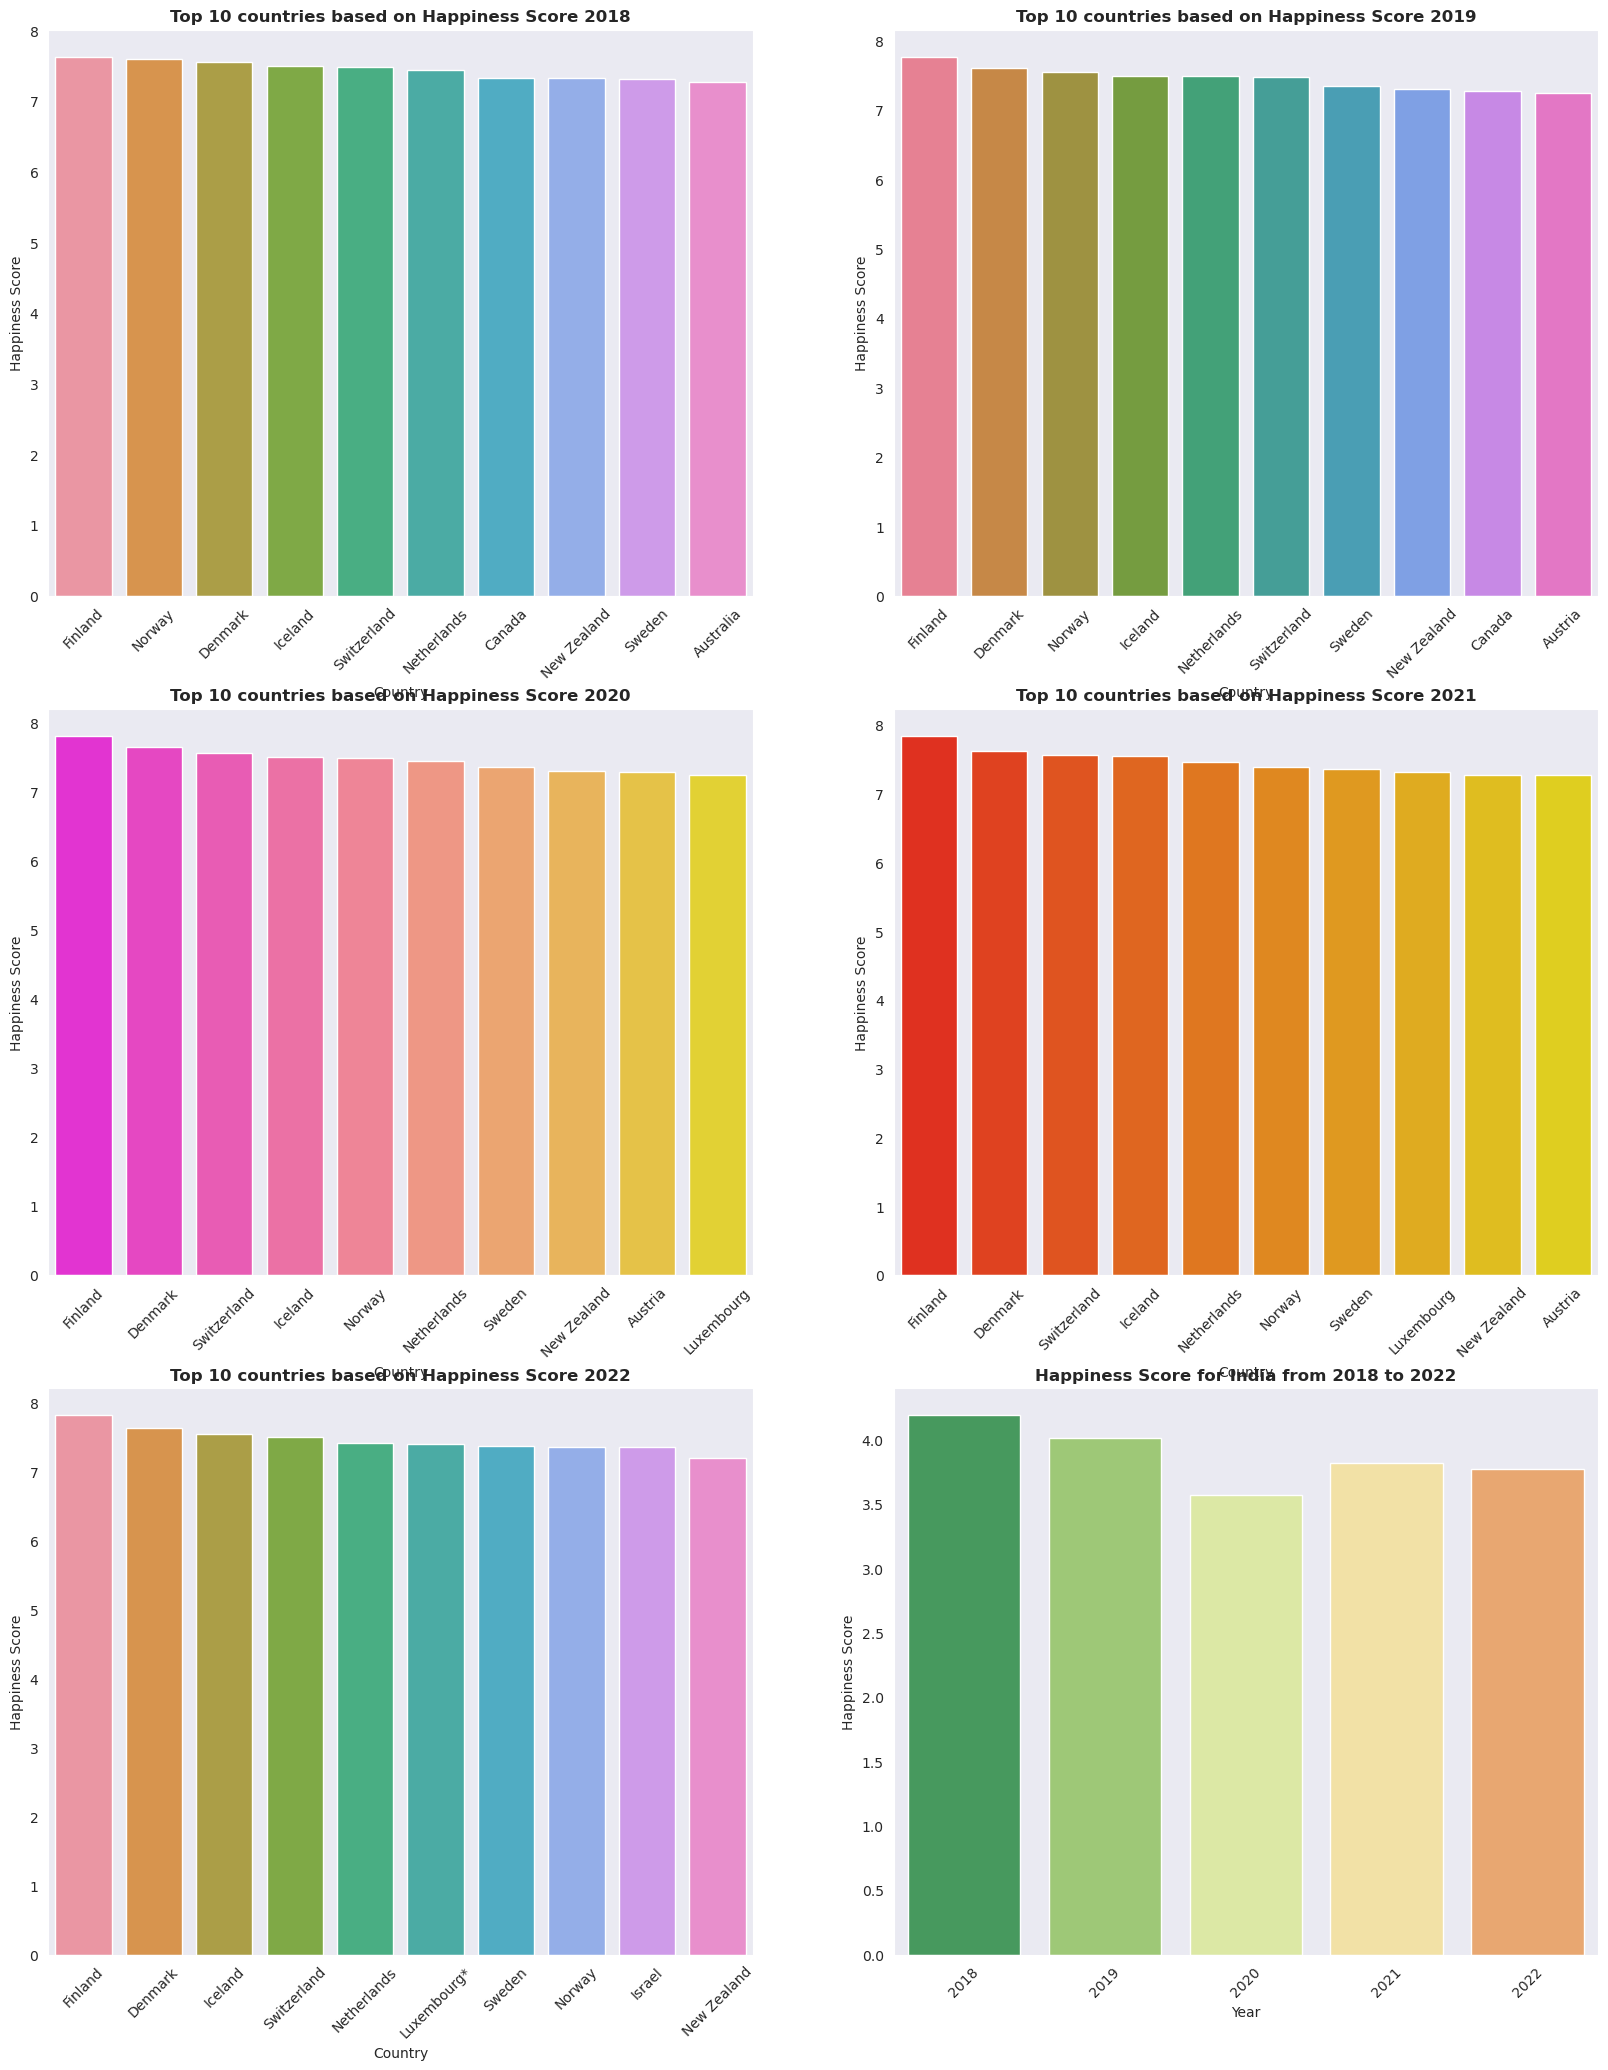

In [133]:
fx,ax=plt.subplots(3,2,figsize=(20,25))

# data_18
sns.barplot(x=data_18['Country'].head(10),y='Happiness Score',data=data_18,ax=ax[0,0])
ax[0,0].set_title('Top 10 countries based on Happiness Score 2018',fontweight="bold")
ax[0,0].tick_params(axis='x', labelrotation=45)

# data_19
sns.barplot(x=data_19['Country'].head(10),y='Happiness Score',data=data_19,palette='husl',ax=ax[0,1])
ax[0,1].set_title('Top 10 countries based on Happiness Score 2019',fontweight="bold")
ax[0,1].tick_params(axis='x', labelrotation=45)

# data_20
sns.barplot(x=data_20['Country'].head(10),y='Happiness Score',data=data_20,palette='spring',ax=ax[1,0])
ax[1,0].set_title('Top 10 countries based on Happiness Score 2020',fontweight="bold")
ax[1,0].tick_params(axis='x', labelrotation=45)

# data_21
sns.barplot(x=data_21['Country'].head(10),y='Happiness Score',data=data_21,palette='autumn',ax=ax[1,1])
ax[1,1].set_title('Top 10 countries based on Happiness Score 2021',fontweight="bold")
ax[1,1].tick_params(axis='x', labelrotation=45)

# data_22
sns.barplot(x=data_22['Country'].head(10),y='Happiness Score',data=data_22,ax=ax[2,0])
ax[2,0].set_title('Top 10 countries based on Happiness Score 2022',fontweight="bold")
ax[2,0].tick_params(axis='x', labelrotation=45)

# data_india
sns.barplot(x=data_india['Year'].head(5),y='Happiness Score',data=data_india,ax=ax[2,1])
ax[2,1].set_title('Happiness Score for India from 2018 to 2022',fontweight="bold")
ax[2,1].tick_params(axis='x', labelrotation=45)

plt.show()

### Plotting bottom 10 happiest countries by year and India

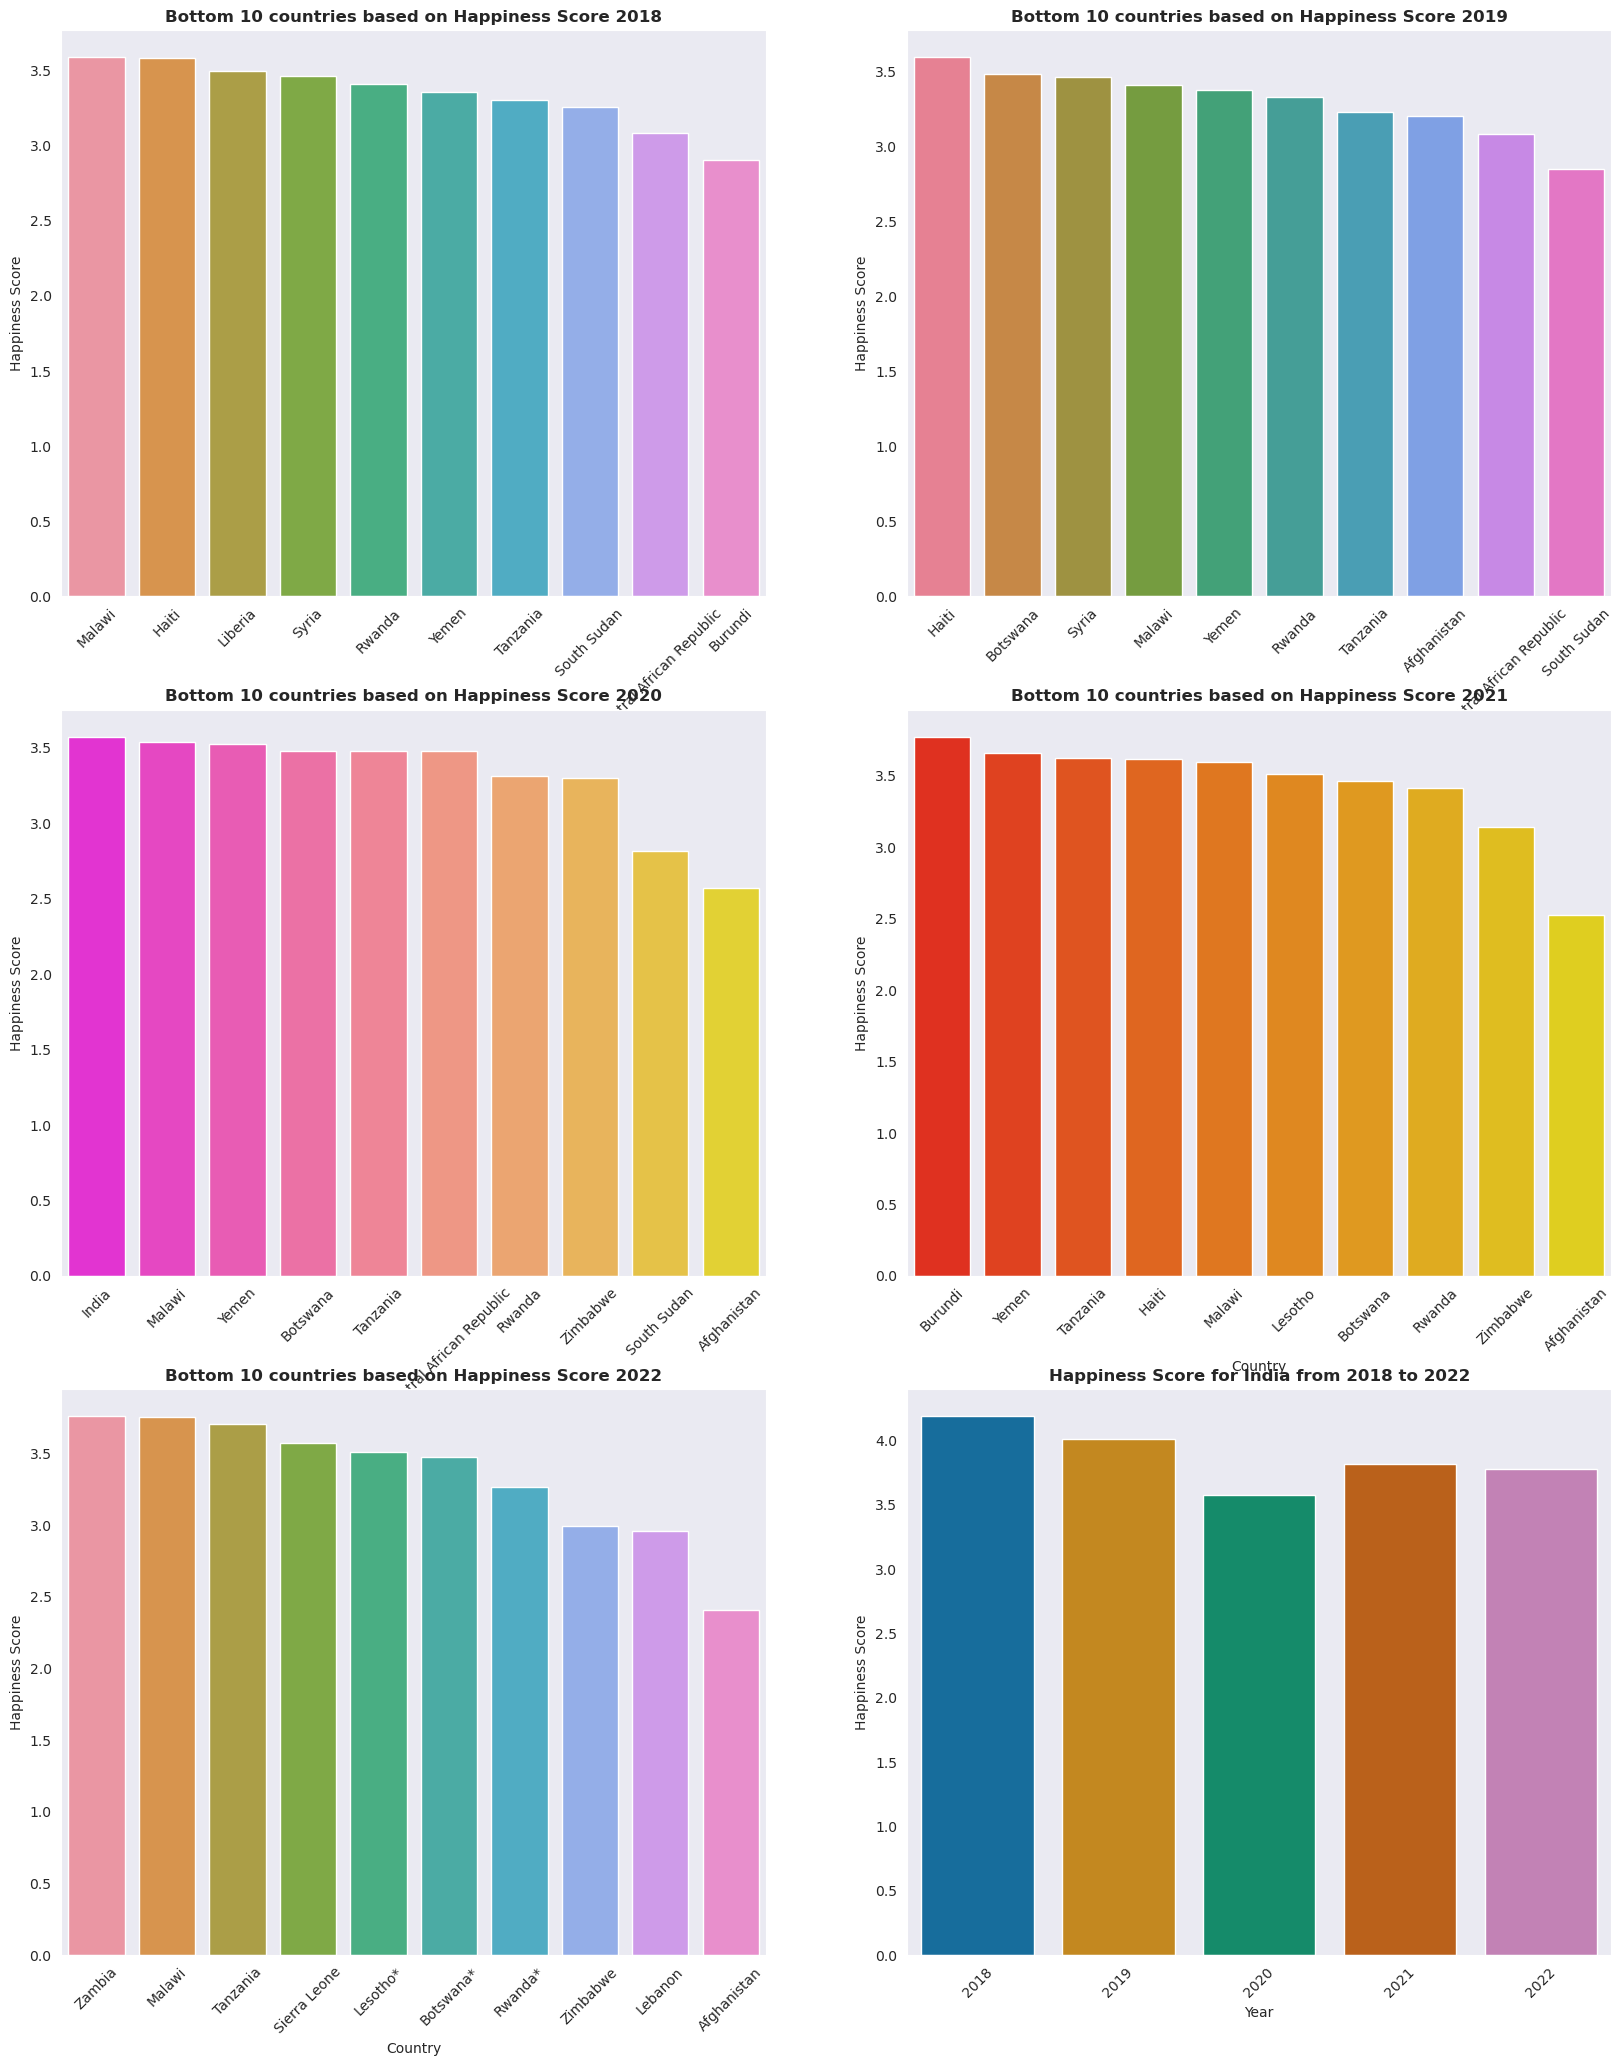

In [134]:
fx,ax=plt.subplots(3,2,figsize=(20,25))

# data_18
sns.barplot(x=data_18['Country'].tail(10),y='Happiness Score',data=data_18,ax=ax[0,0])
ax[0,0].set_title('Bottom 10 countries based on Happiness Score 2018',fontweight="bold")
ax[0,0].tick_params(axis='x', labelrotation=45)

# data_19
sns.barplot(x=data_19['Country'].tail(10),y='Happiness Score',data=data_19,palette='husl',ax=ax[0,1])
ax[0,1].set_title('Bottom 10 countries based on Happiness Score 2019',fontweight="bold")
ax[0,1].tick_params(axis='x', labelrotation=45)

# data_20
sns.barplot(x=data_20['Country'].tail(10),y='Happiness Score',data=data_20,palette='spring',ax=ax[1,0])
ax[1,0].set_title('Bottom 10 countries based on Happiness Score 2020',fontweight="bold")
ax[1,0].tick_params(axis='x', labelrotation=45)

# data_21
sns.barplot(x=data_21['Country'].tail(10),y='Happiness Score',data=data_21,palette='autumn',ax=ax[1,1])
ax[1,1].set_title('Bottom 10 countries based on Happiness Score 2021',fontweight="bold")
ax[1,1].tick_params(axis='x', labelrotation=45)

# data_22
sns.barplot(x=data_22['Country'].tail(10),y='Happiness Score',data=data_22,ax=ax[2,0])
ax[2,0].set_title('Bottom 10 countries based on Happiness Score 2022',fontweight="bold")
ax[2,0].tick_params(axis='x', labelrotation=45)

# data_india
sns.barplot(x=data_india['Year'].head(5),y='Happiness Score',data=data_india,palette='colorblind',ax=ax[2,1])
ax[2,1].set_title('Happiness Score for India from 2018 to 2022',fontweight="bold")
ax[2,1].tick_params(axis='x', labelrotation=45)

### Charting greatest decrease in happiness for countries from 2018 to 2022

<AxesSubplot:title={'center':'Countries with largest decrease in Happiness Score 2018->2022'}, xlabel='Country', ylabel='2018_2022_diff'>

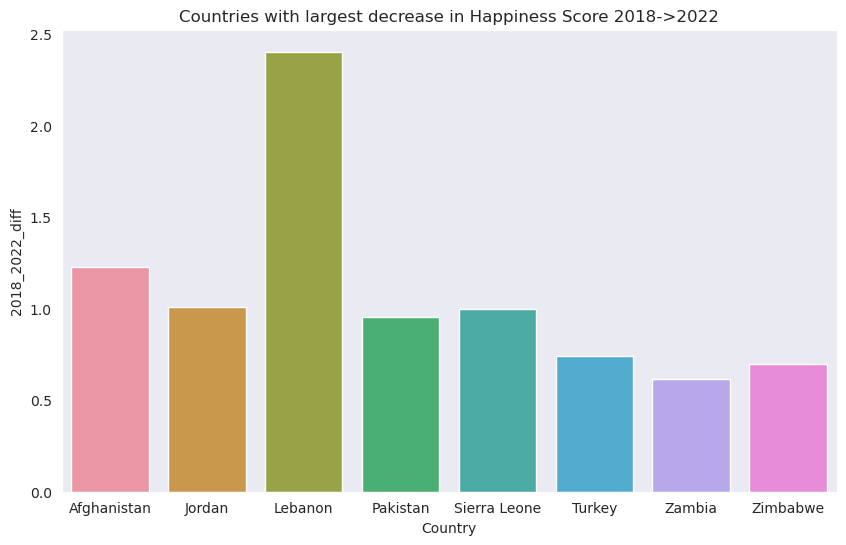

In [135]:
#Charting top changing countries comparing 2018-2021

copy_2018 = data_18.copy()
copy_2022 = data_22.copy()

copy_2018 = copy_2018.set_index("Country")
copy_2018 = copy_2018.sort_index()

copy_2022 = copy_2022.set_index("Country")
copy_2022 = copy_2022.sort_index()


copy_2022["2018_2022_diff"] = copy_2018["Happiness Score"] - copy_2022["Happiness Score"]
copy_2022["2018_score"] = copy_2018["Happiness Score"]
#copy_2015["Happiness Score"].describe()

largest_diff = (copy_2022.nlargest(n = 8,columns = "2018_2022_diff"))["2018_2022_diff"].to_frame()
largest_diff = largest_diff.sort_index()
largest_diff



plt.figure(figsize = (10,6))
plt.title("Countries with largest decrease in Happiness Score 2018->2022")
sns.barplot(data = largest_diff, y = "2018_2022_diff", x = largest_diff.index)

### Charting greatest increase in happiness for countries from 2018 to 2022

<AxesSubplot:title={'center':'Countries with largest increase from years 2018->2022'}, xlabel='Country', ylabel='2018_2022_increase'>

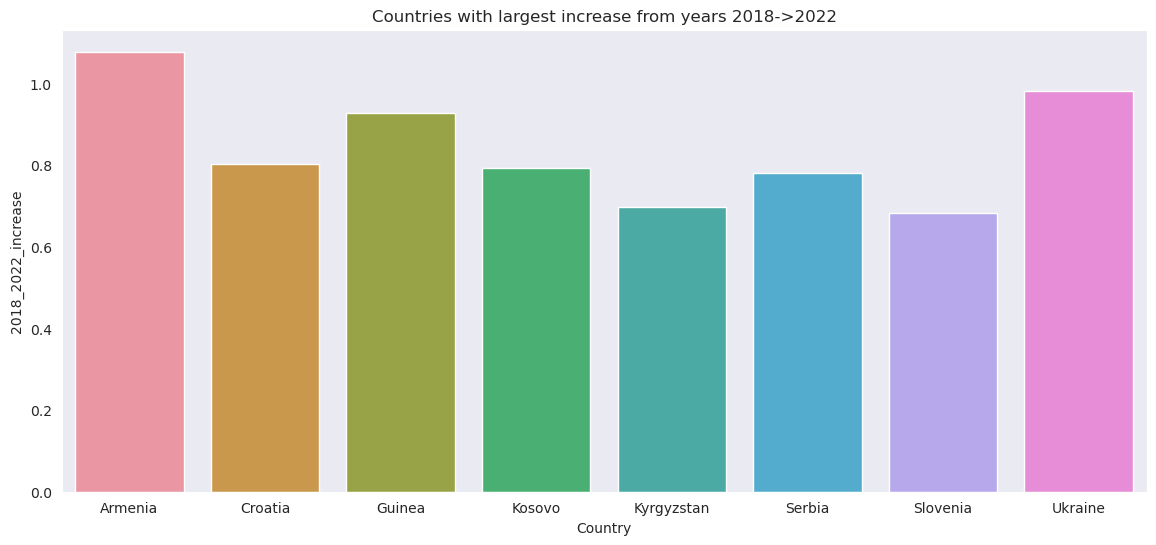

In [136]:
copy_2018 = data_18.copy()
copy_2018 = copy_2018.set_index("Country").sort_index()

copy_2022 = data_22.copy()
copy_2022 = copy_2022.set_index("Country").sort_index()

copy_2022["2018_2022_increase"] = copy_2018["Happiness Score"] - copy_2022["Happiness Score"]
copy_2022["2018_score"] = copy_2018["Happiness Score"]

increase_diff = copy_2022.nsmallest(n = 8, columns = "2018_2022_increase")["2018_2022_increase"].to_frame()
increase_diff = increase_diff.sort_index()
increase_diff = increase_diff.abs()

plt.figure(figsize = (14,6))
plt.title("Countries with largest increase from years 2018->2022")
sns.barplot(data = increase_diff, y = "2018_2022_increase", x = increase_diff.index)

### Countries with least change between years 2018 to 2022

<AxesSubplot:title={'center':'Countries with least change between years 2018 to 2022'}, xlabel='abs_score_change', ylabel='Country'>

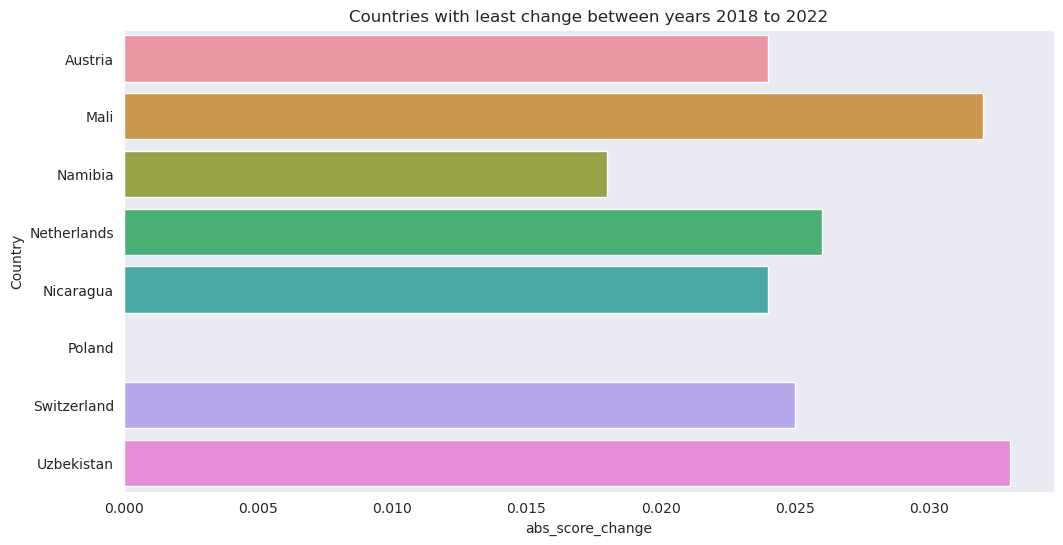

In [137]:
copy_2018 = data_18.copy()
copy_2018 = copy_2018.set_index("Country").sort_index()

copy_2022= data_22.copy()
copy_2022= copy_2022.set_index("Country").sort_index()

copy_2022["2018_2022_increase"] = copy_2018["Happiness Score"] - copy_2022["Happiness Score"]
copy_2022["2018_score"] = copy_2018["Happiness Score"]

copy_2022["abs_score_change"] = copy_2022["2018_2022_increase"].abs()

min_change = copy_2022.nsmallest(n = 8, columns = "abs_score_change")["abs_score_change"].to_frame()
min_change = min_change.sort_index()

plt.figure(figsize = (12, 6))
plt.title("Countries with least change between years 2018 to 2022")
sns.set_style("dark")
sns.barplot(data = min_change, x = "abs_score_change", y = min_change.index, orient = 'h')

## Trend of happiness score over time

### India in numbers

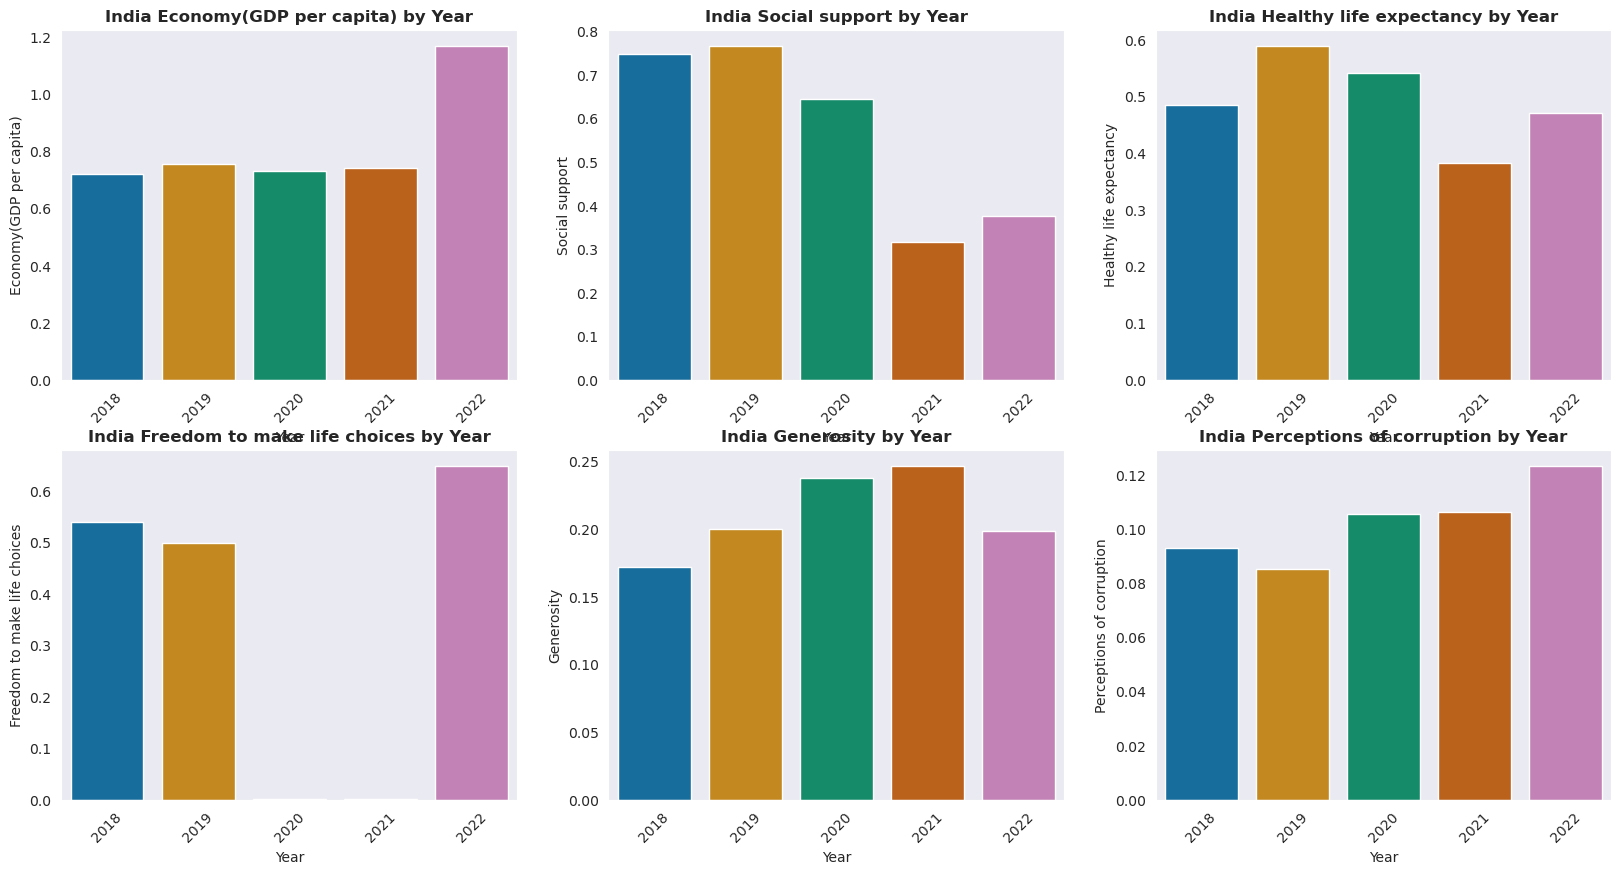

In [138]:
fx,ax=plt.subplots(2,3,figsize=(20,10))

# Economy(GDP per capita)
sns.barplot(x=data_india['Year'].tail(5),y='Economy(GDP per capita)',data=data_india,palette='colorblind',ax=ax[0,0])
ax[0,0].set_title('India Economy(GDP per capita) by Year',fontweight="bold")
ax[0,0].tick_params(axis='x', labelrotation=45)


# Social support
sns.barplot(x=data_india['Year'].tail(5),y='Social support',data=data_india,palette='colorblind',ax=ax[0,1])
ax[0,1].set_title('India Social support by Year',fontweight="bold")
ax[0,1].tick_params(axis='x', labelrotation=45)


# Healthy life expectancy
sns.barplot(x=data_india['Year'].tail(5),y='Healthy life expectancy',data=data_india,palette='colorblind',ax=ax[0,2])
ax[0,2].set_title('India Healthy life expectancy by Year',fontweight="bold")
ax[0,2].tick_params(axis='x', labelrotation=45)


# Freedom
sns.barplot(x=data_india['Year'].tail(5),y='Freedom to make life choices',data=data_india,palette='colorblind',ax=ax[1,0])
ax[1,0].set_title('India Freedom to make life choices by Year',fontweight="bold")
ax[1,0].tick_params(axis='x', labelrotation=45)


# Generosity
sns.barplot(x=data_india['Year'].tail(5),y='Generosity',data=data_india,palette='colorblind',ax=ax[1,1])
ax[1,1].set_title('India Generosity by Year',fontweight="bold")
ax[1,1].tick_params(axis='x', labelrotation=45)


# Perceptions of corruption
sns.barplot(x=data_india['Year'].tail(5),y='Perceptions of corruption',data=data_india,palette='colorblind',ax=ax[1,2])
ax[1,2].set_title('India Perceptions of corruption by Year',fontweight="bold")
ax[1,2].tick_params(axis='x', labelrotation=45)

### Inferences:

-Indian Economy has made a great leap and tried to recover after COVID-19 became less prevalent.

-India's social support system

-In term of social support system, India lags behind a lot in this field and needs a good amount of work here.

-India's health life expectancy showed improvement till the 2020 COVID-19 wave hit India.

-India's perception of their freedom also improved till COVID-19 lockdowns hampered free movement and many essential services.

-India's Generosity has more or less improved since last 5 years, showing a spike during periods when COVID-19 lockdowns were forcing people to increasingly rely on each other.

-India's perception of corruption has shown a generally upward trend over our selected period of 5 years.

### We consider a few countries to see the general trend over the years.

In [139]:
df_a=pd.concat([data_18,data_19,data_20,data_21,data_22],axis=0)

In [140]:
countries=['India',
           'United States',
           'United Kingdom',
           'Russia',
           'China',
           'Canada',
           'Germany',
           'France',
           'Switzerland',
           'Iceland',
           'Denmark', 
           'Norway', 
           'Finland',
           'Netherlands',
           'Japan', 
           'South Korea',
           'Italy',
           'Singapore']

df1=df_a[df_a['Country'].isin(countries)]

In [141]:
fig=px.line(df1,x='Year',y='Happiness Score',color='Country',template="plotly_dark")
fig.show()

### Observation:

-The happiness score of Finland is constantly incresing over the years and has the highest score since 2018.

-India shows a decreasing trend in the data and is the lowest among the countries considered in the plot.

-Most countries do not seem to see significant differences in their happiness levels over our selected period of 5 years.

# Further Analysis using happiness report 2022

## Comparison of metrics between happiest and unhappiest countries for 2020

In [142]:
mask_happy=data_22.loc[(data_22["Rank"]<=10)&(data_22["Year"]==2022)]
mask_happy

,Rank,Country,Year,Happiness Score,Dystopia and residual,Economy(GDP per capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,2022,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,2022,7.636,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,2022,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,2022,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,2022,7.415,2.137,1.945,1.206,0.787,0.651,0.271,0.419
5,6,Luxembourg*,2022,7.404,2.042,2.209,1.155,0.790,0.700,0.120,0.388
6,7,Sweden,2022,7.384,2.003,1.920,1.204,0.803,0.724,0.218,0.512
7,8,Norway,2022,7.365,1.925,1.997,1.239,0.786,0.728,0.217,0.474
8,9,Israel,2022,7.364,2.634,1.826,1.221,0.818,0.568,0.155,0.143
9,10,New Zealand,2022,7.200,1.954,1.852,1.235,0.752,0.680,0.245,0.483


In [143]:
mask_unhappy=data_22.loc[(data_22["Rank"]>=144)&(data_22["Year"]==2022)]
mask_unhappy

,Rank,Country,Year,Happiness Score,Dystopia and residual,Economy(GDP per capita),Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
143,144,Zimbabwe,2022,2.995,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2022,2.955,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2022,2.404,1.263,0.758,0.000,0.289,0.000,0.089,0.005


In [144]:
#!pip install hvplot

In [145]:
happiness_score_happy=mask_happy.hvplot.bar(x="Country", y="Happiness Score", title="Happiness Score for the happiest and unhappiest countries for 2021", rot=40, width=800, height=400)
happiness_score_unhappy=mask_unhappy.hvplot.bar(x="Country", y="Happiness Score")
happiness_score_happy*happiness_score_unhappy

:Overlay
   .Bars.I  :Bars   [Country]   (Happiness Score)
   .Bars.II :Bars   [Country]   (Happiness Score)

In [146]:
gdp_hap=mask_happy.hvplot.bar(x="Country", y="Economy(GDP per capita)", title="GDP per Capita for the happiest and the most unhappy countries for 2021" , rot=40, width=800, height=400)
gdp_unhap=mask_unhappy.hvplot.bar(x="Country", y="Economy(GDP per capita)")
gdp_hap*gdp_unhap

:Overlay
   .Bars.I  :Bars   [Country]   (Economy(GDP per capita))
   .Bars.II :Bars   [Country]   (Economy(GDP per capita))

In [147]:
health_hap=mask_happy.hvplot.bar(x="Country", y="Healthy life expectancy", title="Healthy life expectancy for the happiest and the most unhappy countries for 2021" , rot=40, width=800, height=400)
health_unhap=mask_unhappy.hvplot.bar(x="Country", y="Healthy life expectancy")
health_hap*health_unhap

:Overlay
   .Bars.I  :Bars   [Country]   (Healthy life expectancy)
   .Bars.II :Bars   [Country]   (Healthy life expectancy)

In [148]:
social_hap=mask_happy.hvplot.bar(x="Country", y="Social support", title="Social support rate for the happiest and the most unhappy countries for 2021" , rot=40, width=800, height=400)
social_unhap=mask_unhappy.hvplot.bar(x="Country", y="Social support")
social_hap*social_unhap

:Overlay
   .Bars.I  :Bars   [Country]   (Social support)
   .Bars.II :Bars   [Country]   (Social support)

In [149]:
corruption_hap=mask_happy.hvplot.bar(x="Country", y="Perceptions of corruption", title="Perceptions of corruption for the happiest and the most unhappy countries for 2021" , rot=40, width=800, height=400)
corruption_unhap=mask_unhappy.hvplot.bar(x="Country", y="Perceptions of corruption")
corruption_hap*corruption_unhap

:Overlay
   .Bars.I  :Bars   [Country]   (Perceptions of corruption)
   .Bars.II :Bars   [Country]   (Perceptions of corruption)

In [150]:
generosity_hap=mask_happy.hvplot.bar(x="Country", y="Perceptions of corruption", title="Generosity for the happiest and the most unhappy countries for 2021" , rot=40, width=800, height=400)
generosity_unhap=mask_unhappy.hvplot.bar(x="Country", y="Perceptions of corruption")
generosity_hap*generosity_unhap

:Overlay
   .Bars.I  :Bars   [Country]   (Perceptions of corruption)
   .Bars.II :Bars   [Country]   (Perceptions of corruption)

In [151]:
freedom_hap=mask_happy.hvplot.bar(x="Country", y="Freedom to make life choices", title="Freedom to make life choices for the happiest and the most unhappy countries for 2021" , rot=40, width=800, height=400)
freedom_unhap=mask_unhappy.hvplot.bar(x="Country", y="Freedom to make life choices")
freedom_hap*freedom_unhap

:Overlay
   .Bars.I  :Bars   [Country]   (Freedom to make life choices)
   .Bars.II :Bars   [Country]   (Freedom to make life choices)

**Notes**: 
Freedom to make choices: Happiest countries have more freedom to make life choices

## Region based analysis

### Region to which most of the Happy countries belong

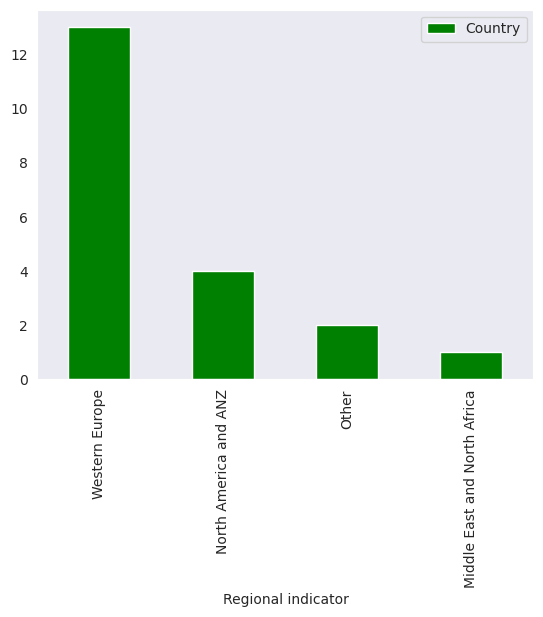

In [152]:
data_22 = data[data['Year'] == 2022] 
data_22.head(20).groupby('Regional indicator').agg({'Country':'count'}).sort_values(by='Country',ascending=False).plot(kind='bar',color='g')
plt.show()

### Visualizing the Regions with low happiness scores

<Figure size 1000x500 with 0 Axes>

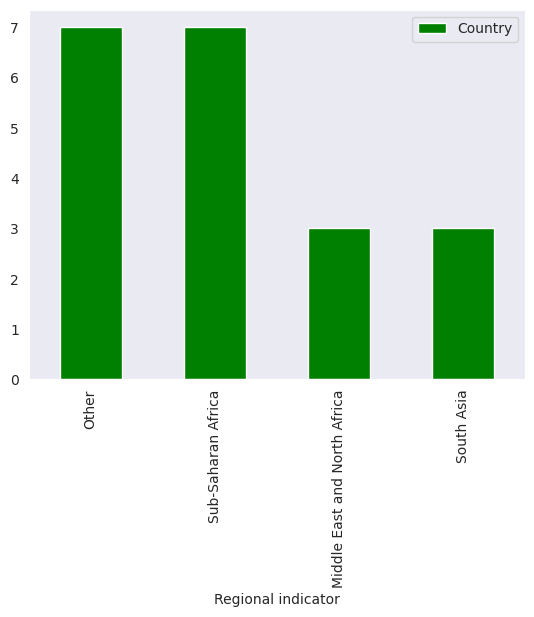

In [153]:
plt.figure(figsize=(10,5))
data_22.tail(20).groupby('Regional indicator').agg({'Country':'count'}).sort_values(by='Country',ascending=False).plot(kind='bar',color='g')
plt.show()

# Creating regression plots for our variables against Happiness Score

In [154]:
cols=['Economy(GDP per capita)',
      'Social support',
      'Healthy life expectancy',
      'Freedom to make life choices',
      'Generosity',
      'Perceptions of corruption']

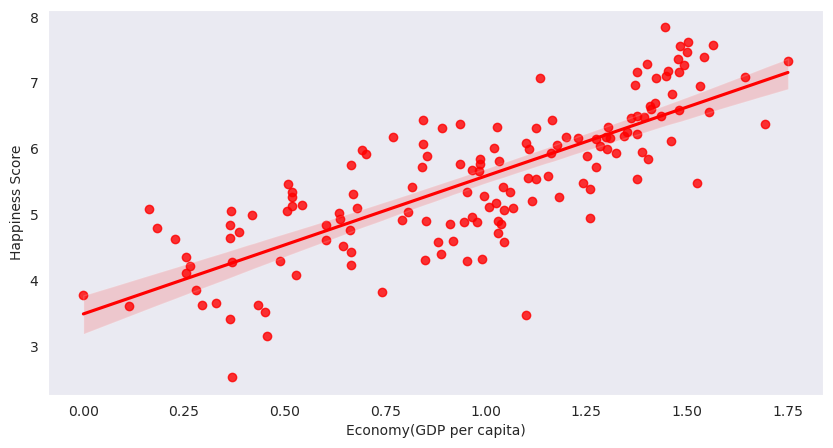

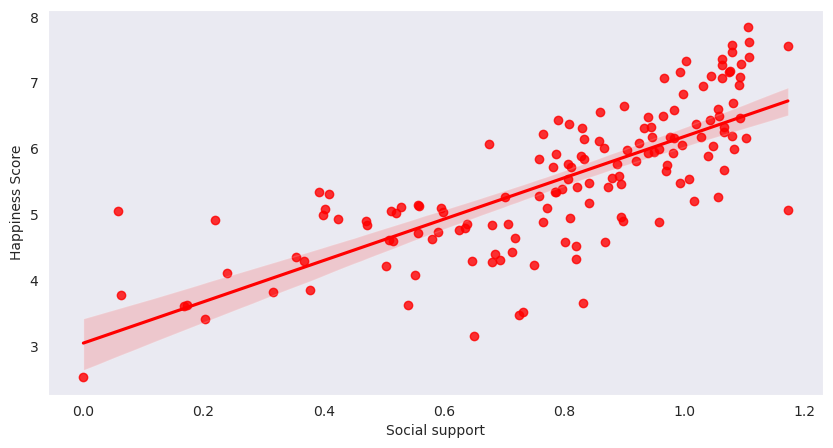

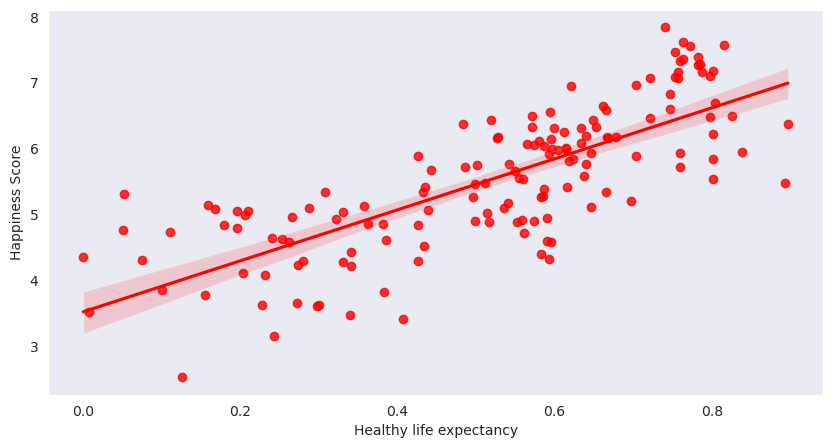

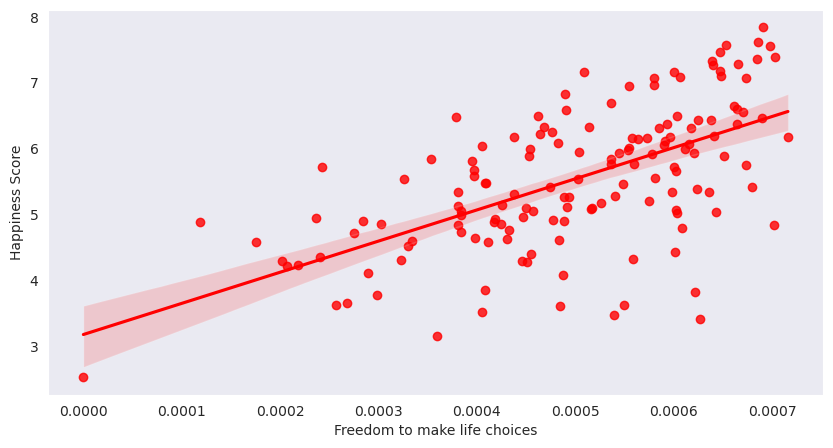

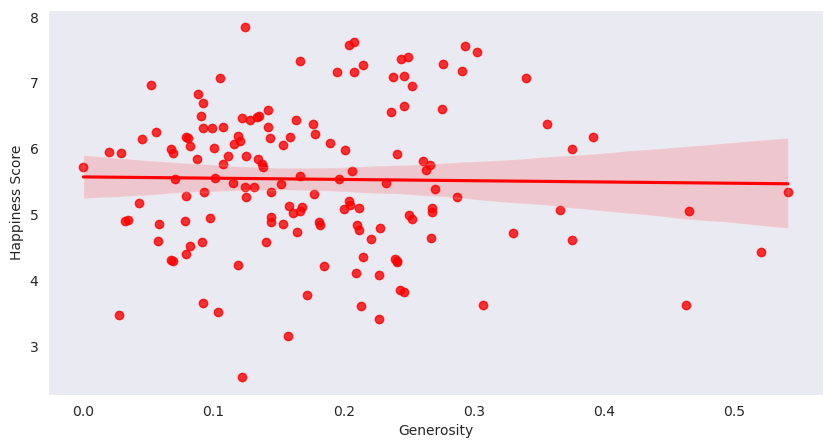

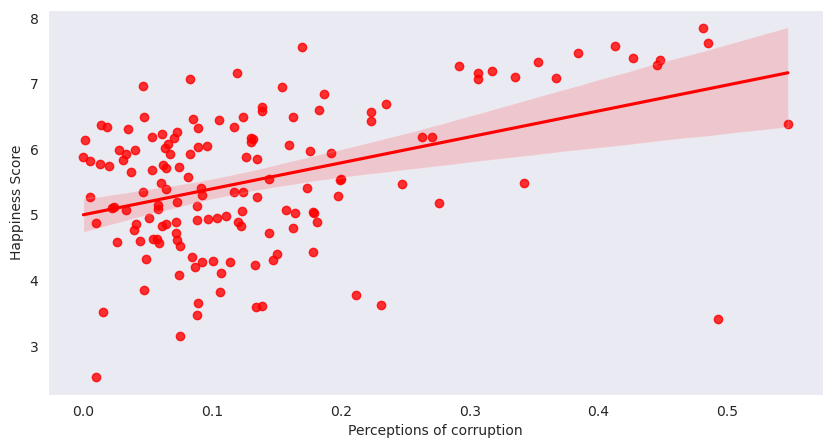

In [155]:
for a in cols:
    plt.figure(figsize=(10,5))
    sns.regplot(x=a,y='Happiness Score',data=data_21,color='r')
    plt.show()

**- The graphs shows that Happiness score is linearly related to GDP, Social Support and Health expectancy.**

**- We see almost no linear relation with Generosity and mild linear relation with Perception of corruption**

## Correlation Between feature and target variables

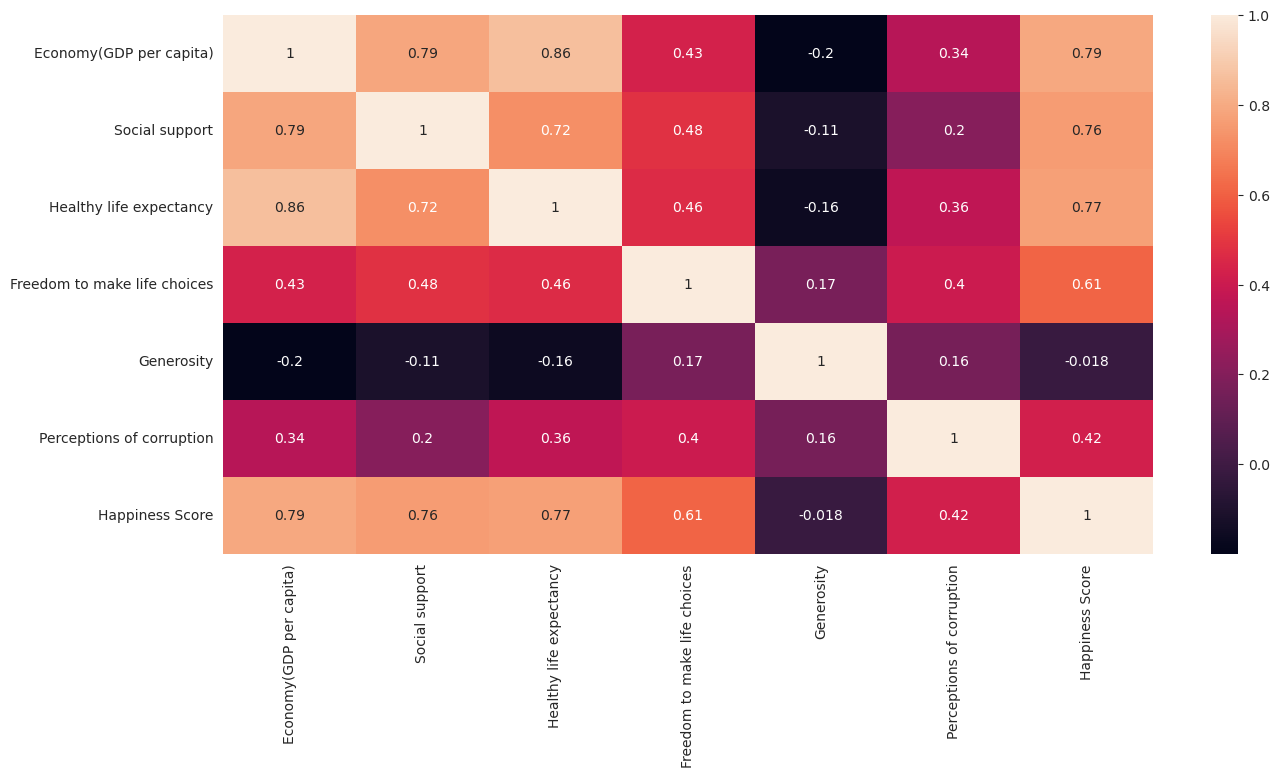

In [156]:
corr=data_21[
              ['Economy(GDP per capita)',
              'Social support',
              'Healthy life expectancy',
              'Freedom to make life choices',
              'Generosity',
              'Perceptions of corruption',
              'Happiness Score']
            ].corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)
plt.show()

**Observation:**

We can see that Score is correlated with GDP,Health expectancy and Social support and is not corellated to Generosity

### 2022 Data

<AxesSubplot:>

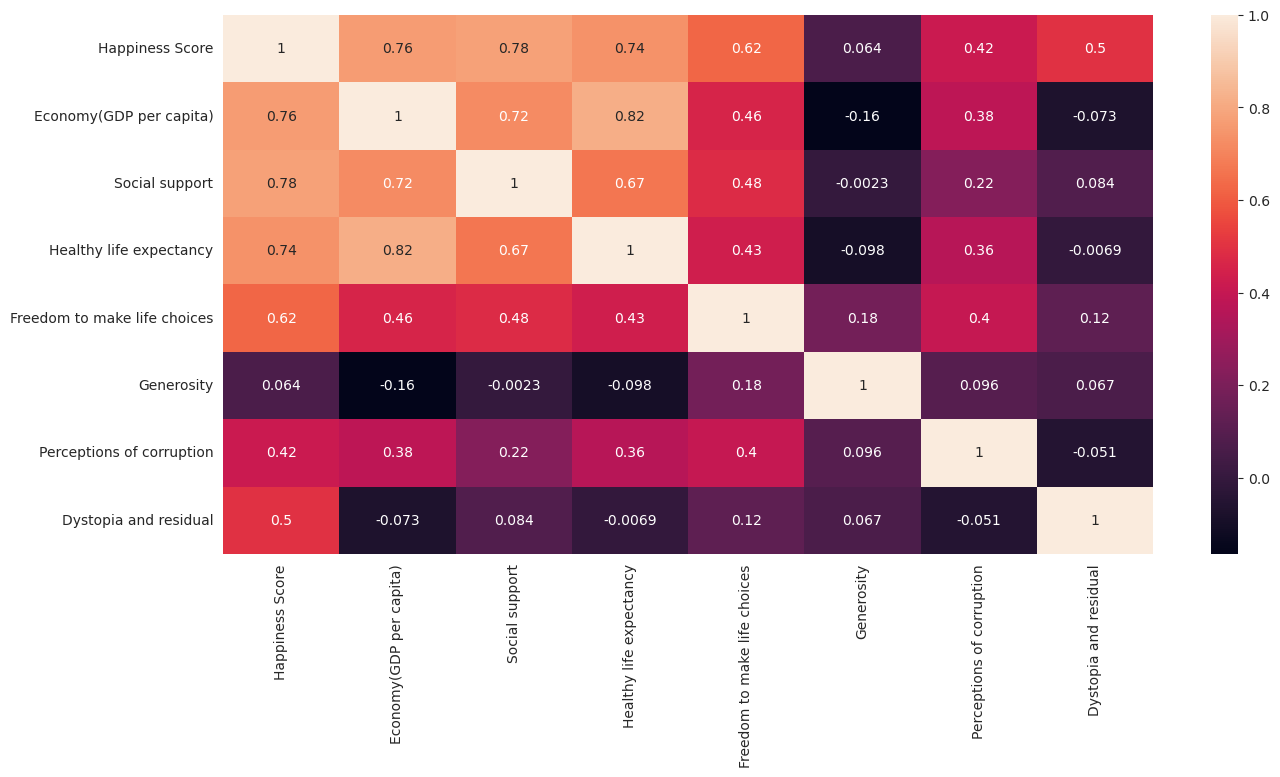

In [157]:
#correlation values for 2022 dataset
#creating a copy of the dataset with 4 columns.

y1=data_22.copy()
y1.drop(['Rank','Year'],axis=1,inplace=True)
#creating a correlation matrix between numeric columns
c2=y1.corr(method='pearson')
plt.figure(figsize=(15,7))
sns.heatmap(c2,annot=True)

### 2021 Data

<AxesSubplot:>

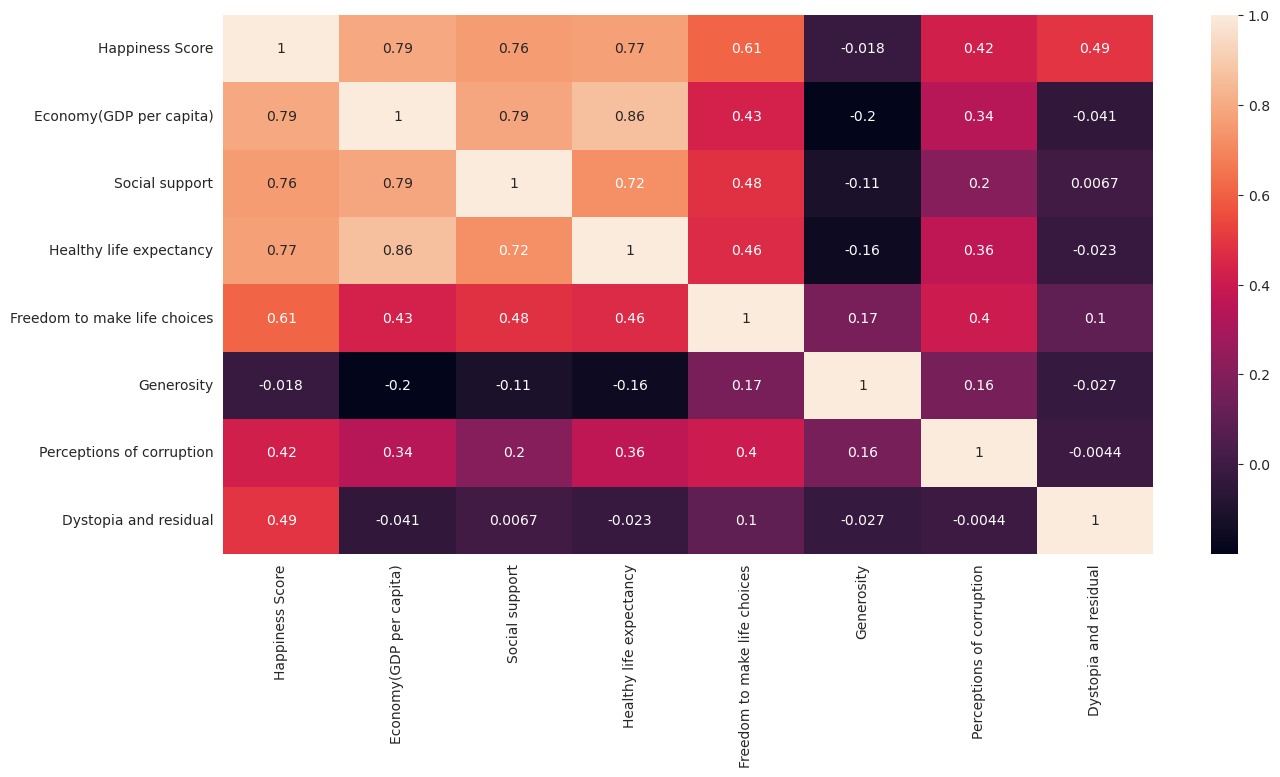

In [158]:
#correlation values for 2021 dataset
#creating a copy of the dataset with 4 columns.

y2=data_21.copy()
y2.drop(['Rank','Year'],axis=1,inplace=True)
#creating a correlation matrix between numeric columns
c2=y2.corr(method='pearson')
plt.figure(figsize=(15,7))
sns.heatmap(c2,annot=True)

### 2020 Data

<AxesSubplot:>

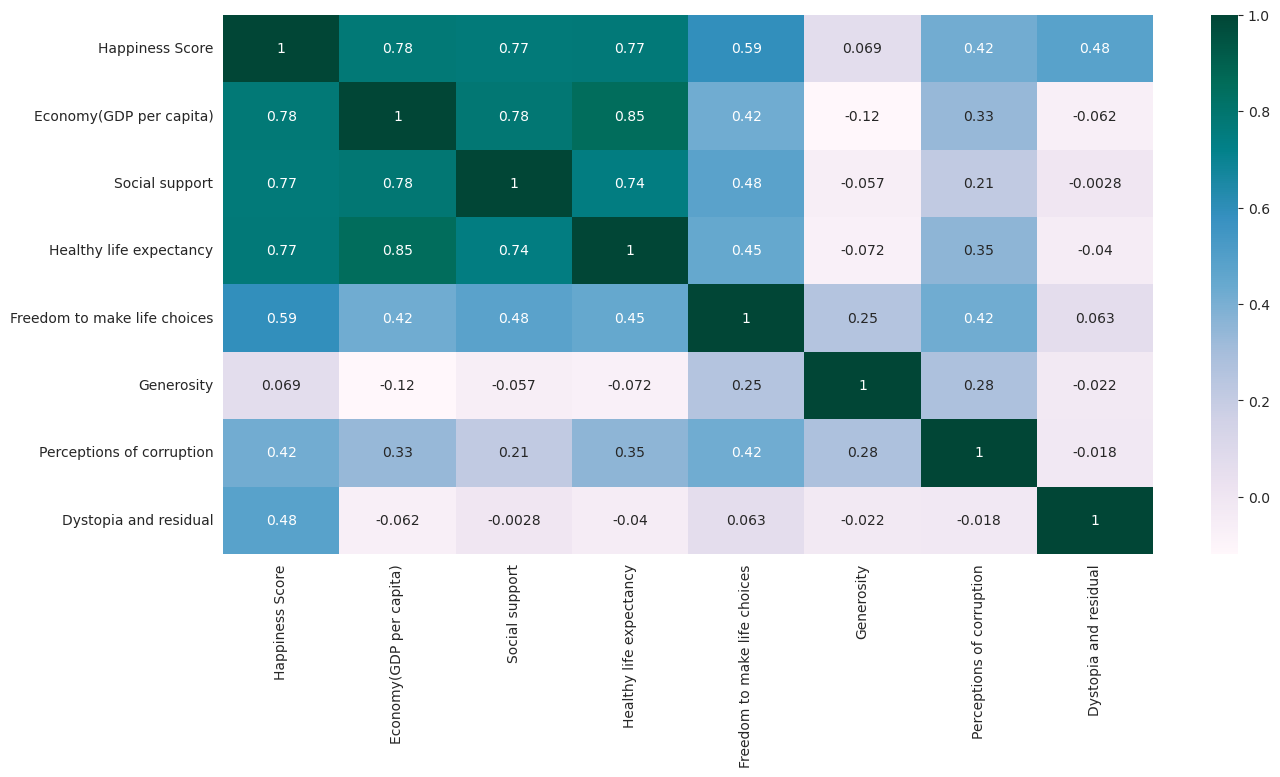

In [159]:
#correlations for 2020 dataset
y3=data_20.copy()
y3.drop(['Rank','Year'],axis=1,inplace=True)

c3=y3.corr()
plt.figure(figsize=(15,7))
sns.heatmap(c3,annot=True,cmap='PuBuGn')

### 2019 Data

<AxesSubplot:>

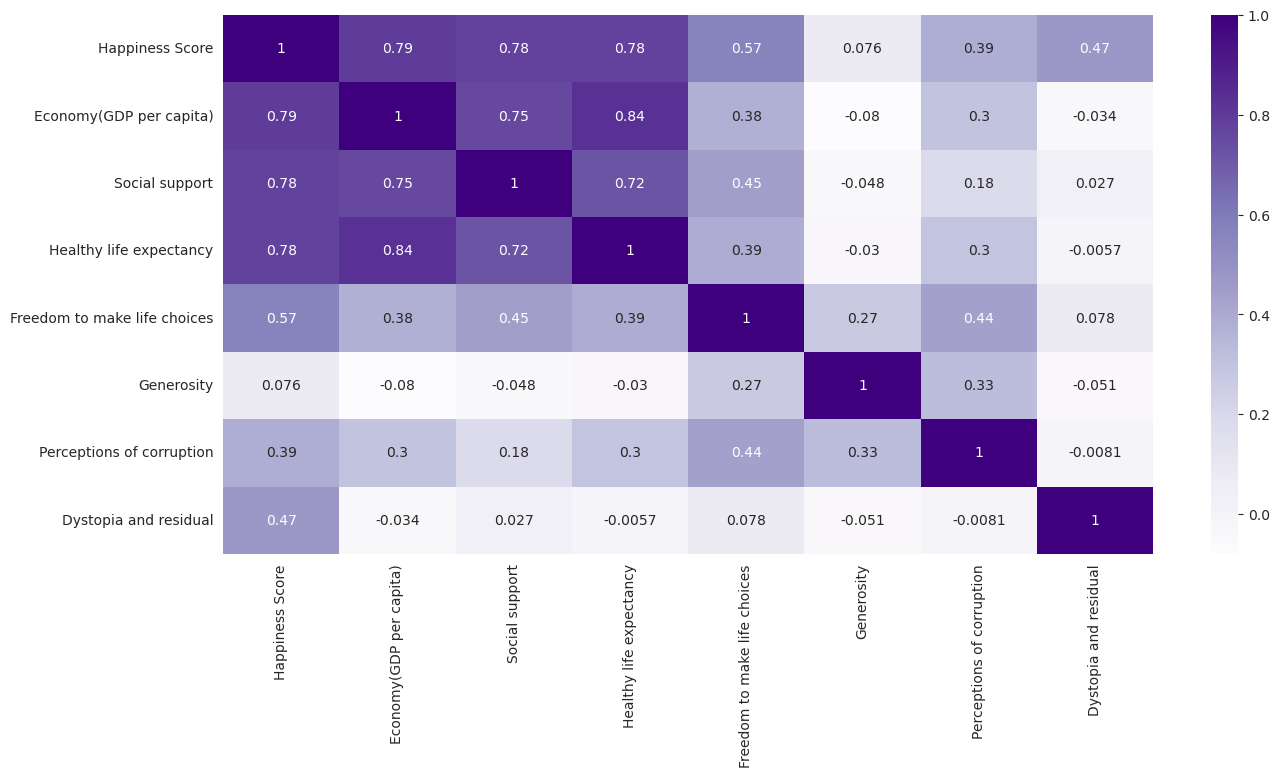

In [160]:
#correlations for 2019 dataset
y4=data_19.copy()
y4.drop(['Rank','Year'],axis=1,inplace=True)

c4=y4.corr()
plt.figure(figsize=(15,7))
sns.heatmap(c4,annot=True,cmap='Purples')

### 2018 Data

<AxesSubplot:>

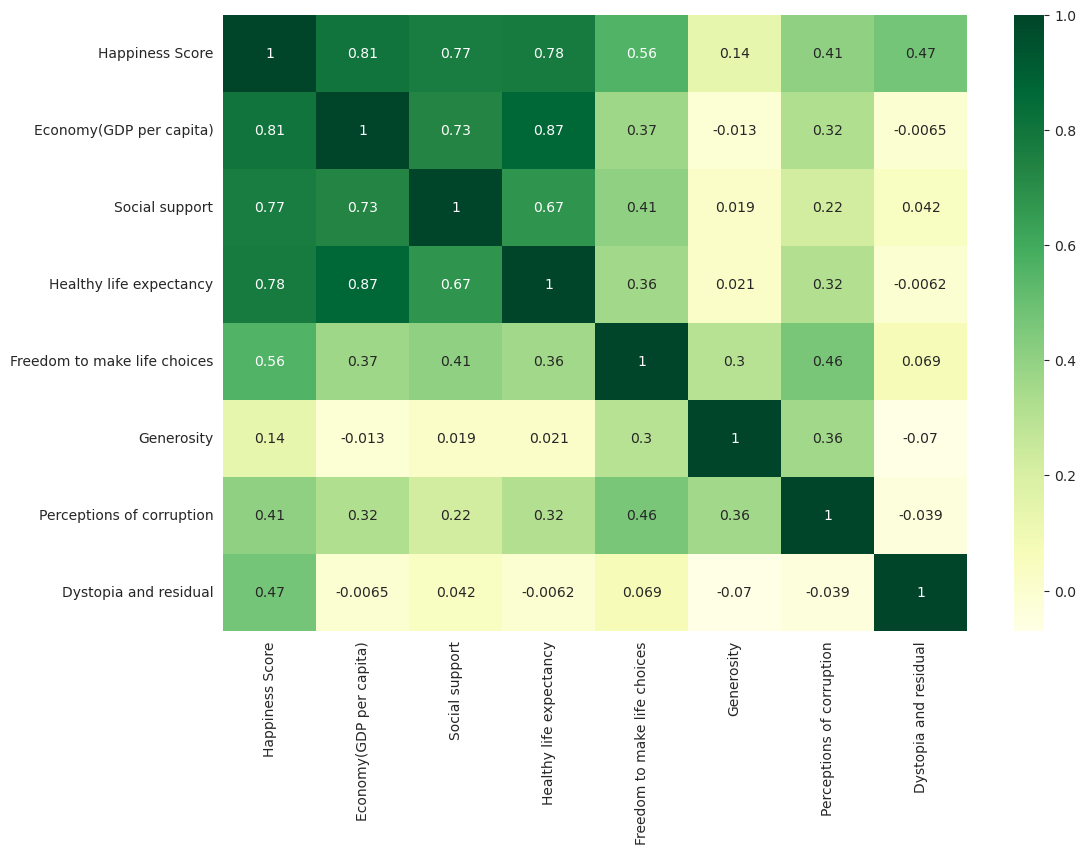

In [161]:
#correlations for 2018 dataset
y5=data_18.copy()
y5.drop(['Rank','Year'],axis=1,inplace=True)

c5=y5.corr()
plt.figure(figsize=(12,8))
sns.heatmap(c5,annot=True,cmap='YlGn')

### Entire data from 2018 to 2022.

<AxesSubplot:>

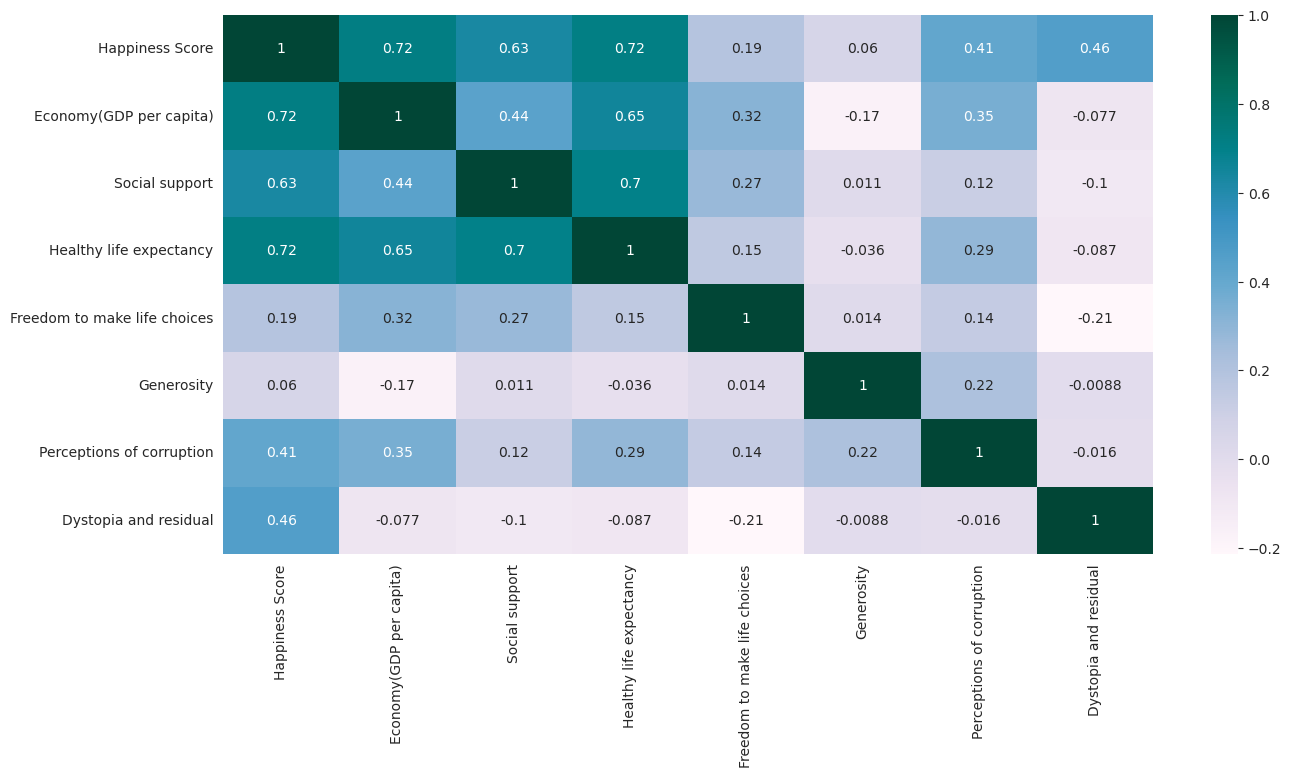

In [162]:
#correlations for 2018 dataset
y5=data.copy()
y5.drop(['Rank','Year'],axis=1,inplace=True)

c5=y5.corr()
plt.figure(figsize=(15,7))
sns.heatmap(c5,annot=True,cmap='PuBuGn')

**_The 5 heatmaps plotted above display correlation matrices between 7 columns, Score, GDP, Freedom and Perception
of Corruption corresponding to each of the years 2015,2017,2019. Now the effects of the 3 factors on Score will be discussed._**

### How is GDP related to Happiness Score?

From the heatmaps,Correlation coefficient between GDP per capita and Score is 0.8,0.79,0.78,0.79,0.76 i.e. ~ **0.79** in all the 5 years indicating a strong positive relationship between the satisfaction of citizens with the GDP and the Happiness score. GDP_per capita is a tracker of the economic growth of a country. People in countries showing positive growth rate of economies tend to be more happier as it leads to higher incomes and better standards of living. Hence, we conclude that the GDP of a country should be one of the top priorities to ensure satisfaction.

### Relation of Freedom to Happiness Score?

The correlation coefficient between Freedom and Score is 0.54,0.57,0.59,0.61,0.62 i.e. **~ 0.59** in all 5 years indicating a moderately positive relationship between the perception of Freedom and the Happiness Score of a country. Generalising this perception of freedom is a hard task because according to research it is different for people belonging to different parts of the world. Nevertheless, it is still a significant contributor to the Happiness Score of a nation.

### How does perception of corruption affect the Happiness score?

Correlation coefficient between corr_perception and Score is **~0.40** for all 5 years. This indicates a weak positive relationship between perception of corruption and the happiness score of a country.

### How do Generosity relate to Happiness Score?

Correlation coefficients are observed to be 0.14,0.076,0.069,-0.018,0.064 i.e **~0.067**  for all 5 years which indicate very weak positive relationship. Not much of a linear change is observed between the two metrics. Generosity is a perception which citizens obtain from each other.

### How do Social Support relate to Happiness Score?
Correlation values of Social Support with Score are 0.75,0.78,0.77,0.76,0.78 i.e **~0.77** for all five years which indicates strong positive relationship. Social support is the perception of how happy people are with their families and friends, acquaintainces, etc.

Since these are the people everyone deals with almost everyday in life, we can consider the perception of Social Support to be a critical factor in determination of Happiness Score.

### How is Dystopia & redsidual related to Happiness Index?
The correlation coefficient between it & score is ~0.47 for all 5 years.

### How is Healthy Life Expectancy related to Happiness Score?
From the heatmaps,Correlation coefficient between Life Expectancy and Score is 0.78,0.78,0.77,0.77,0.76 i.e. ~ **0.78** in all the 5 years indicating a strong positive relationship between the Life Expectancy and the Happiness score.It implies that if health &  eventually expected life of a nation is good,it improves happiness of score. If person becomes unhealthy & gets some sort of morbidities,he/she feels tragic and sorrowful.Thereby affecting his/her Happiness.



_Healthy life expectancy (HLE) is a population health measure that combines mortality data with morbidity or health status data to estimate expected years of life in good health for persons at a given age_

## Regression Analysis of year 2022
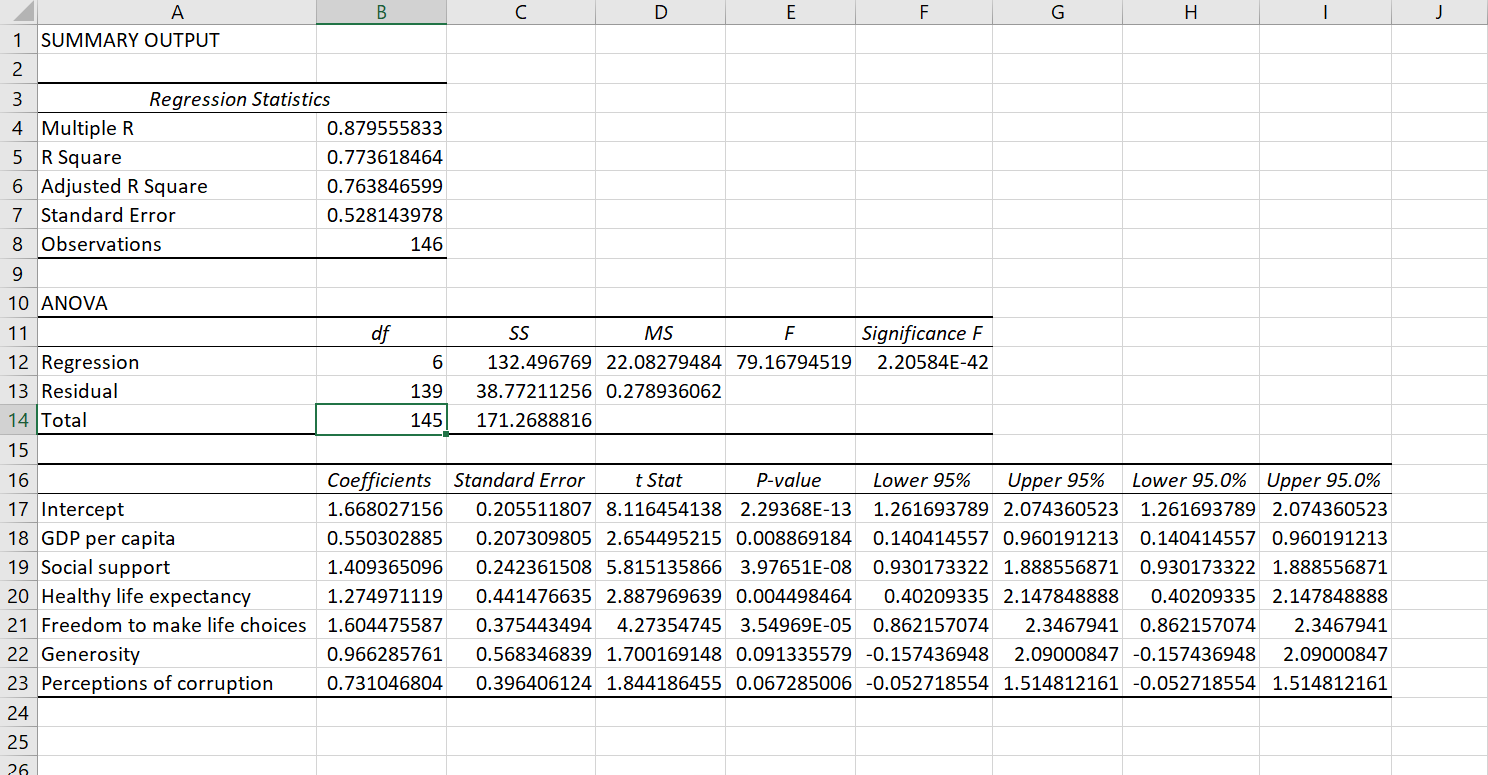

-R square of 0.77 predicts that our our independent variables explains 77 % of our dependent variable.

-The F statistic is 79.16 and significance value is 2.2 which implies that the overall model is statistically significant.

-Intercept value is 1.668 which gives the value of Happiness index when all other indicators are zero. The P-value is indicative that the intercept is statistically right.

-Coefficient of GDP is 0.55 & p value is 0.008 (0<0.08) which implies that cofficients is likely not equal to zero. And similarly ,we can see and analysefor all other independent variables.

# CONCLUSION

This examination represented that the world's **happiest nations** are essentially in **North Western Europe, North America, and Australia and New Zealand**. It likewise uncovered that **Economy (GDP per capita) is the main consider assessing a nation's happiness**. Obviously, the happiest nations and world districts commonly would in general be ones with solid and stable economies.

The significance of Economy is likewise unequivocally decidedly connected with those of **Family and Health**. This is normal, since more economic might and higher GDP per capita by and large energizes steady and comfortable family life as well as builds the accessibility of proper clinical assets and medical services. These elements then weigh more while deciding overall happiness.

**Happier countries** tend to be those with **longer life expectancies, and a higher GDP**. This is also true most of Western Europe. By and large, African countries have lower life expectancy, a lower GDP, and ultimately, lower happiness index scores.

Thus We can Conclude that **GDP per Capita, Healthy Life Expectancy and Socail Support are three of the major factor that determine the state of Happiness in a country.**